 *Data Preprocessing is a technique that is used to convert the raw data into a clean data set, preparing it and making it suitable for a machine learning model.*

 *This is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.*

**Lifecycle of a Data science project :**
1. EDA : 
    - Numerical features (Histogram)
    - Categorical features (Bar charts)
    - Missing values (Visualise these with all graphs (correlation))
    - Outliers (Box plots)
   
2. Feature Engineering:
    - Handling missing values
    - Imbalanced datatset
    - Handling outliers (Z-score)
    - Handling Categorical features
    - Normalisation and standarisation
   
3. Feature selection:
    - Correlation
    - Feature Importance (Extra tree classifiers)
    - Chi-square test
    - K-neighbours
    - Univariate analysis 

### Feature engineering :


- Variable Identification

- Handling Null Values

- Handling categorical variables

- Handling Redundancy/Duplicates in data

- Handling Outliers

- Exploratory Data Analysis

- Feature Engineering

- Feature Selection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_df = pd.read_csv('titanic_dataset.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.shape

(891, 12)

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.shape

(891, 12)

**Variable Identification**

In [8]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
for i in titanic_df:
    print(i, ':',titanic_df[i].nunique(), 'labels')

PassengerId : 891 labels
Survived : 2 labels
Pclass : 3 labels
Name : 891 labels
Sex : 2 labels
Age : 88 labels
SibSp : 7 labels
Parch : 7 labels
Ticket : 681 labels
Fare : 248 labels
Cabin : 147 labels
Embarked : 3 labels


**Handling Null values**

 *Missing values in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.*

 *Different types of Missing data:* 

1. Missing Completely at Random(MCAR) : A variable is missing completely at random if the probability of being missing is same for all the observations. When data is MCAR, no relationship b/w data missing and any other values, missing or not. For eg. Embraked column has no relationship with other missing values like Age or Cabin. It is completely random to miss values. 

In [11]:
titanic_df[titanic_df['Embarked'].isnull()]
#random missing values of embarked > no relationship with Age or cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. Missing completely at Not random (MCNR) : A value is not missing completely at random but there exists certain relationship b/w other variables, missing or not. For eg. "Cabin" and "Age" column have missing values but they have relationship i.e. if a cabin did not survive, we would not be able to find age of people in that cabin. We will explore this further. 

In [12]:
titanic_df['Age'].isnull().sum()

177

In [13]:
len(titanic_df[titanic_df['Age'].isnull() & titanic_df['Cabin'].isnull()])

158

About 158 out of 178 age values are misssing in which Cabin values are missing so we have very strong relationship b/w these two columns and they are not missing at random. Let's see how many people survived vs Not survived if "Caib" value is Null

In [14]:
titanic_df['Cabin_null'] = np.where(titanic_df['Cabin'].isnull(), 1, 0)
titanic_df['Cabin_null'].mean() #77% of cabin values are missing

0.7710437710437711

In [15]:
titanic_df.groupby('Survived')['Cabin_null'].mean() #87% of missing values in Cabin column are where people did not survive

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

3. Missing at Random (MAR) -- A value which is missing at Random even though they should be there. For eg. Age when people survived. This might be because they did not fill the survey properly or data was not correctly handled

In [92]:
titanic_df['Age_null'] = np.where(titanic_df['Age'].isnull(),1,0)
titanic_df.groupby('Survived')['Age_null'].mean() #about 15% of people with age = Null survived but still we don't have their age values

Survived
0    0.227687
1    0.152047
Name: Age_null, dtype: float64

**Techniques to handle missing data**

- Mean/mode/Median replacement
- Dropping values (Not in small datasets)
- Random Sample Imputation
- Capturing NaN values with a new feature
- End of distribution sample
- Arbitary Imputation
- Frequent category imputation

**Mean/Mode/Median imputation**

**When to apply?** In case of **Missing completely at Random (MCAR)**, *Median* should be used in Continous data (to avoid outliers) and *Mode* should be used in case of categorical data

In [93]:
df = titanic_df[['Age', 'Sex', 'Survived']]
df.head()

,Age,Sex,Survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0


In [95]:
df.isnull().mean()

Age         0.198653
Sex         0.000000
Survived    0.000000
dtype: float64

In [98]:
df['Age_median'] = df['Age'].fillna(df['Age'].median())
df['Age_median'].head()

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/2439939862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_median'] = df['Age'].fillna(df['Age'].median())


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age_median, dtype: float64

In [99]:
df['Age_median'].isnull().sum()

0

In [100]:
df.columns

Index(['Age', 'Sex', 'Survived', 'Age_median'], dtype='object')

In [101]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


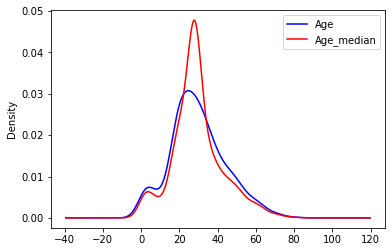

In [102]:
fig = plt.figure()
ax = plt.subplot(111)
df['Age'].plot(kind = 'kde', ax = ax, color = 'blue')
df['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
ax.legend()

**Advantages:**
1. Easy to implement 
2. Faster way to obtain dataset

**Disadvantages:**
1. High distortion and variance b/w orignal and imputed dataset
2. Most values will be around median which wil impact training and can lead to overfitting

**Random sampling imputation**

It consists of taking random samples from dataset and we use those value to fill our NaN values. It assumes data is *Missing at Complete Random (MACR)*

In [103]:
df = titanic_df[['Survived', 'Age', 'Fare']]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [104]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [111]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 4)

480     9.0
325    36.0
141    22.0
541     9.0
242    29.0
       ... 
600    24.0
149    42.0
157    30.0
117    29.0
356    22.0
Name: Age, Length: 177, dtype: float64

In [120]:
# def imput_nan(df, variable):
#     df[variable+'_random'] = df[variable].fillna(df['Age'].dropna().sample(random_state = 0))

def imput_nan(df, variable):
    df[variable+'_median'] = df[variable].fillna(df[variable].median())
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    random_sample.index = df.loc[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [121]:
imput_nan(df, 'Age')

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3685778677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_median'] = df[variable].fillna(df[variable].median())
C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3685778677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_random'] = df[variable]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [122]:
print(df['Age'].std())
print(df['Age_random'].std())
print(df['Age_median'].std())

14.526497332334044
14.5636540895687
13.019696550973194


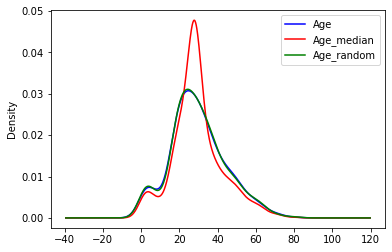

In [123]:
fig = plt.figure()
ax = plt.subplot(111)
df['Age'].plot(kind = 'kde', ax = ax, color = 'blue')
df['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
df['Age_random'].plot(kind = 'kde', ax = ax, color = 'green')
ax.legend()

**Advantages**
1. Easy to implement
2. No distoration of variance like Median

**Disadvantages**
1. Randomness can't be applied everywhere

**Capturing NaN values with a new feature**

We create a new feature to capture the importance of Null values in a feature. This can be implemented with assumption that samples are not missing completely at random (MNAR). For eg. Age and cabin. If we assign some importance to Null values in Age column and Null values in Cabin column, we can assign them a value so their Null importance (and relationship b/w them) can be captured by Model

In [31]:
df = titanic_df[['Age', 'Survived', 'Fare']]
df.head()

,Age,Survived,Fare
0,22.0,0,7.2500
1,38.0,1,71.2833
2,26.0,1,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500


In [32]:
df['Age_null'] =np.where(df['Age'].isnull(),1,0)
df['Age_null'].head()

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3451721692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_null'] =np.where(df['Age'].isnull(),1,0)


0    0
1    0
2    0
3    0
4    0
Name: Age_null, dtype: int32

In [33]:
df.head()

,Age,Survived,Fare,Age_null
0,22.0,0,7.2500,0
1,38.0,1,71.2833,0
2,26.0,1,7.9250,0
3,35.0,1,53.1000,0
4,35.0,0,8.0500,0


Now, even if we impute Age with some statistical meausure like Mean,Median,Mode,etc. or random sampling..we would still have something to assign importance to that Null value in our model

In [34]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df.head(10)
# for eg. Age row 5 has null value importance of 1 attached to it even after we have imputed it with Mean

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Age,Survived,Fare,Age_null
0,22.000000,0,7.2500,0
1,38.000000,1,71.2833,0
2,26.000000,1,7.9250,0
3,35.000000,1,53.1000,0
4,35.000000,0,8.0500,0
5,29.699118,0,8.4583,1
6,54.000000,0,51.8625,0
7,2.000000,0,21.0750,0
8,27.000000,1,11.1333,0
9,14.000000,1,30.0708,0


**Advantages**
* Easy to implement
* Captures the importance of missing values

**Disadvantages**
* Not suitable if we have too many features already -Creation of additional features (curse of dimensionality) 

**End of distribution imputation**

In this method, we impute our Null values that are at the end of the tail i.e far from the median. This can lead to reduction in our outliers since we would be imputing our values at the end of the tail with outliers

In [35]:
df = titanic_df[['Age', 'Survived', 'Fare']]
df.head()

,Age,Survived,Fare
0,22.0,0,7.2500
1,38.0,1,71.2833
2,26.0,1,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500


In [36]:
df['Age'].isnull().sum()

177

<AxesSubplot:>

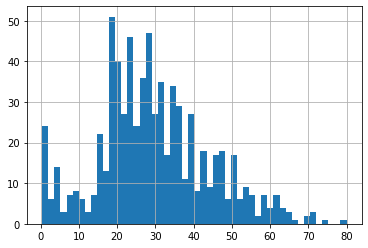

In [37]:
df['Age'].hist(bins = 50)
#values that are at the end of the tail are between 70 and 80 as opposed to mean which is in 20-30 range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

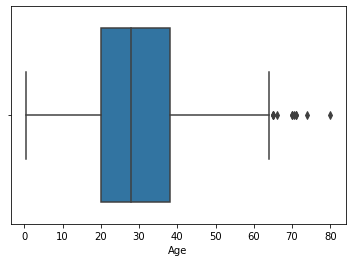

In [38]:
sns.boxplot(df['Age'])

# we have several outliers 

In [39]:
df['Age'].median()

28.0

In [40]:
extreme = df['Age'].median() + 3*df['Age'].std()
extreme
#extreme value in normal distribution is at the end of 3rd std of median

71.57949199700212

In [41]:
extreme = df['Age'].median() + 3*df['Age'].std()
median = df['Age'].median()

def impute_age(df, variable, extreme, median):
    df[variable+'_extreme'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [42]:
impute_age(df, 'Age', extreme, median)

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/120802849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_extreme'] = df[variable].fillna(extreme)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:>

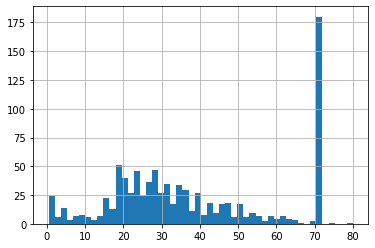

In [43]:
df['Age_extreme'].hist(bins = 50)

#imputed with end of dist

<AxesSubplot:>

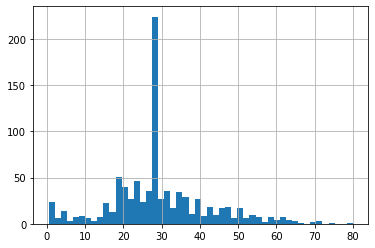

In [44]:
df['Age'].hist(bins = 50)

#imputed with median

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_extreme'>

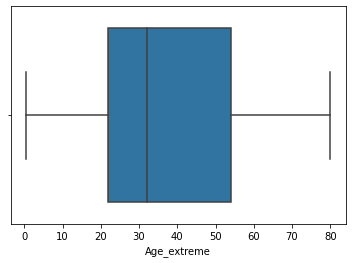

In [45]:
sns.boxplot(df['Age_extreme'])
#most of our data has shifted towrad end of distrubution which has helped in dealing with outliers
#this is not ideal and may only work with datset where we are completely sure about value of outliers 

**Advantages**

* Easy to implement
* Helps to deal with outliers

**Disadvantages**
* Leads to distoration and huge variance

**Arbitary value Imputation**

This technique is derived from a kaggle competition. It consists of replacing NaN value with an arbitary value 

In [46]:
df = titanic_df[['Age', 'Survived', 'Fare']]
df.head()

,Age,Survived,Fare
0,22.0,0,7.2500
1,38.0,1,71.2833
2,26.0,1,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500


<AxesSubplot:>

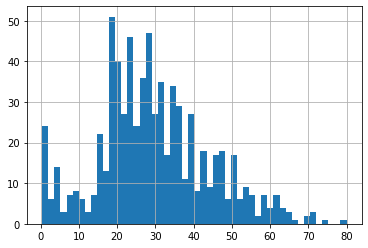

In [47]:
df['Age'].hist(bins = 50)

In [48]:
def impute_df(df, variable):
    df[variable+'_hundread'] = df[variable].fillna(100)
    df[variable+'_zeroes'] = df[variable].fillna(0)
    df[variable+'25th'] = df[variable].fillna(25)
    df[variable+'_50th'] = df[variable].fillna(50)

In [49]:
impute_df(df, 'Age')

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3586641275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_hundread'] = df[variable].fillna(100)
C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3586641275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_zeroes'] = df[variable].fillna(0)
C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3586641275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [50]:
df.head()

,Age,Survived,Fare,Age_hundread,Age_zeroes,Age25th,Age_50th
0,22.0,0,7.2500,22.0,22.0,22.0,22.0
1,38.0,1,71.2833,38.0,38.0,38.0,38.0
2,26.0,1,7.9250,26.0,26.0,26.0,26.0
3,35.0,1,53.1000,35.0,35.0,35.0,35.0
4,35.0,0,8.0500,35.0,35.0,35.0,35.0


It is very rarely used. Most frequently used methods in continous missing variables are Random sampling and Mean/Mode/Median

**Advantages**
* Easy to implement
* Captures the importance of missingness if there's one

**Disadvantages**

* Hard to decide which value to use
* If missingness is not important it may mask the predictive power of orignal variable

#### How to Handle Categorical Missing values 

**Frequent category Imputation**

In [124]:
housing_df = pd.read_csv('Housing_Prices.csv')

In [125]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [126]:
df = housing_df[['GarageType', 'BsmtQual', 'FireplaceQu', 'Heating', 'SalePrice']]
df.head()

,GarageType,BsmtQual,FireplaceQu,Heating,SalePrice
0,Attchd,Gd,NaN,GasA,208500
1,Attchd,Gd,TA,GasA,181500
2,Attchd,Gd,TA,GasA,223500
3,Detchd,TA,Gd,GasA,140000
4,Attchd,Gd,TA,GasA,250000


<AxesSubplot:>

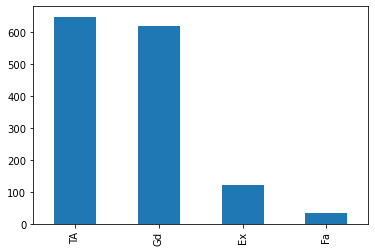

In [139]:
# df.groupby(by = 'BsmtQual')['BsmtQual'].count().sort_values(ascending = False).plot(kind = 'bar')

df['BsmtQual'].value_counts().plot(kind = 'bar')

In [146]:
# df['BsmtQual'].mode()[0]

df['BsmtQual'].value_counts().index[0]

'TA'

In [56]:
def impute_col(df):
    variable = df.columns
    for i in variable :
        df[i].fillna(df[i].value_counts(ascending = False).index[0], inplace = True)

In [57]:
impute_col(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [58]:
df.isnull().sum()

GarageType     0
BsmtQual       0
FireplaceQu    0
Heating        0
SalePrice      0
dtype: int64

**Advantages**

* Easy to implement

**Disadvantes**

* Since we are using more frequent variables, it may use them in an overrepresented way
* It distorts the relation of most frequent label

**Computing Null Importance with a new feature**

It is used to give importance to missing values in columns. For eg. if one column has missing values but we imputed it with Mode  and number of missing values were huge so even if we imputed them, we still model to take those values in account

In [59]:
df = housing_df[['GarageType', 'BsmtQual', 'FireplaceQu', 'Heating', 'SalePrice']]
df.head()

,GarageType,BsmtQual,FireplaceQu,Heating,SalePrice
0,Attchd,Gd,NaN,GasA,208500
1,Attchd,Gd,TA,GasA,181500
2,Attchd,Gd,TA,GasA,223500
3,Detchd,TA,Gd,GasA,140000
4,Attchd,Gd,TA,GasA,250000


In [60]:
df['BsmtQual'].isnull().sum()

37

In [150]:
df['BsmtQual'+'_imp'] = np.where(df['BsmtQual'].isnull(),1,0)
df.head() #assigning an importance when missing completely not at random 

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/2066584643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtQual'+'_imp'] = np.where(df['BsmtQual'].isnull(),1,0)


,GarageType,BsmtQual,FireplaceQu,Heating,SalePrice,BsmtQual_imp
0,Attchd,Gd,NaN,GasA,208500,0
1,Attchd,Gd,TA,GasA,181500,0
2,Attchd,Gd,TA,GasA,223500,0
3,Detchd,TA,Gd,GasA,140000,0
4,Attchd,Gd,TA,GasA,250000,0


In [151]:
#after assigning importance, let's impute
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace = True)
df.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,GarageType,BsmtQual,FireplaceQu,Heating,SalePrice,BsmtQual_imp
0,Attchd,Gd,NaN,GasA,208500,0
1,Attchd,Gd,TA,GasA,181500,0
2,Attchd,Gd,TA,GasA,223500,0
3,Detchd,TA,Gd,GasA,140000,0
4,Attchd,Gd,TA,GasA,250000,0
5,Attchd,Gd,NaN,GasA,143000,0
6,Attchd,Ex,Gd,GasA,307000,0
7,Attchd,Gd,TA,GasA,200000,0
8,Detchd,TA,TA,GasA,129900,0
9,Attchd,TA,TA,GasA,118000,0


**Imputing it with a new category altogether**

In most scenarios, where frequent values are high i.e. mode of a particular value is high and there is huge imalance, imputing with Mode can lead to overrepresentation of that value so in those cases we should create a new category altogether. For isntance "Other"

In [152]:
df['FireplaceQu'].value_counts() 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [153]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Other')

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/11961879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FireplaceQu'] = df['FireplaceQu'].fillna('Other')


In [154]:
df['FireplaceQu'].isnull().sum()

0

In [155]:
df['FireplaceQu'].value_counts()

Other    690
Gd       380
TA       313
Fa        33
Ex        24
Po        20
Name: FireplaceQu, dtype: int64

**Handling Categorical Features**

**One Hot Encoding**

In [156]:
df = titanic_df[['Sex', 'Embarked']]

In [157]:
df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [161]:
pd.get_dummies(df['Sex'], drop_first = False).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [162]:
# we can use drop_first to drop first column because if male is 0 then it is female and vise versa..
#this helps in reducing the curse of dimensationality

pd.get_dummies(df['Sex'], drop_first = True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [163]:
df['Embarked'].unique()
df.dropna(inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [164]:
# pd.get_dummies(df['Embarked'], drop_first = False).head()
pd.get_dummies(df['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


One-Hot Encoding works well when you have limited value in one column but when we have multiple categories for eg. city then it will lead to **Curse of dimensionality** since we will create a lot of columns with distinct values so in those cases we can perform **One-Hot Encoding on Top values** instead. Let's see it in action..

In [200]:
mercedez_df = pd.read_csv('mercedez_df.csv')
mercedez_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [182]:
df = mercedez_df[['X1', 'X2', 'X3', 'X4']]
df.head()

,X1,X2,X3,X4
0,v,at,a,d
1,t,av,e,d
2,w,n,c,d
3,t,n,f,d
4,v,n,f,d


In [183]:
df['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [184]:
list(df['X1'].value_counts()[:11].index)
#for eg. in this column, if we perform usual one-hot encoding it would lead to creation of lot of features
#so we can take top 10 and perform one-hot encoding on those variables

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o', 'w']

In [185]:
top_10 = list(df['X1'].value_counts()[:11,].index)
top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o', 'w']

In [186]:
pd.get_dummies(df['X1'])

,a,aa,ab,b,c,d,e,f,g,h,...,p,q,r,s,t,u,v,w,y,z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [188]:
for i in top_10:
    df[i] = np.where(df['X1'] == i,1,0)

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/1912812415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = np.where(df['X1'] == i,1,0)


In [193]:
df[['X1'] + top_10].head(10)

,X1,aa,s,b,l,v,r,i,a,c,o,w
0,v,0,0,0,0,1,0,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0,1
3,t,0,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,1,0,0,0,0,0,0
5,b,0,0,1,0,0,0,0,0,0,0,0
6,r,0,0,0,0,0,1,0,0,0,0,0
7,l,0,0,0,1,0,0,0,0,0,0,0
8,s,0,1,0,0,0,0,0,0,0,0,0
9,b,0,0,1,0,0,0,0,0,0,0,0


In [192]:
df[top_10]
#for eg t is not a top 10 member of X1 so it's not been encoded at all 
#but v is one of the top 10 members so it's been considered

,aa,s,b,l,v,r,i,a,c,o,w
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1,0
4206,0,0,0,0,1,0,0,0,0,0,0
4207,0,0,0,0,0,1,0,0,0,0,0


In [194]:

def hot_encoding(df):
    variable = list(df.columns)
    for i in variable :
        top_10 = list(df[i].value_counts()[:11,].index)
        for j in top_10:
            df[j] = np.where(df[i] == j, 1,0)
			

In [195]:

hot_encoding(df)

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3903329558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j] = np.where(df[i] == j, 1,0)


In [196]:
df.head()

,X1,X2,X3,X4,aa,s,b,l,v,r,...,m,ak,n,f,e,aq,d,g,0,1
0,v,at,a,d,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,t,av,e,d,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,w,n,c,d,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,t,n,f,d,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
4,v,n,f,d,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,1,0


**Ordinal number Encoding**

In [210]:
import datetime as dt
from pandas.tseries.offsets import DateOffset

In [206]:
dt.date.today()

datetime.date(2023, 8, 28)

In [217]:
import datetime as dt
dt.date.today() + DateOffset(days = -1)
dt.date.today() + dt.timedelta(days = -1)

datetime.date(2023, 8, 27)

In [231]:
data = pd.DataFrame([dt.date.today() + DateOffset(days = -i) for i in range(0,15)])
data.columns = ['Days']
data['weekday_name'] = data['Days'].dt.day_name()
data.head()
# [dt.date.today() + dt.timedelta(days = -i) for i in range(0,15)]

,Days,weekday_name
0,2023-08-28,Monday
1,2023-08-27,Sunday
2,2023-08-26,Saturday
3,2023-08-25,Friday
4,2023-08-24,Thursday


In [259]:
#ordinal encoding > ranking 
#for eg. high speed - 0, medium speed - 1, low speed - 2
#we can give rankings to days
#we can use dictionary and map it to column
#or we can use inbuilt ordinalencoder

# dictionary = {
#     'Monday':1, 'Tuesday' :2, 'Wednesday' :3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7
# }

# data['ordinal_ranking'] = data['weekday_name'].map(dictionary)
# data.head()

from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()

data['weekday_ordinal'] = ordinal.fit_transform(data['weekday_name'].values.reshape(-1,1))
data.head()

,Days,weekday_name,ordinal_ranking,weekday_ordinal
0,2023-08-28,Monday,1,1.0
1,2023-08-27,Sunday,7,3.0
2,2023-08-26,Saturday,6,2.0
3,2023-08-25,Friday,5,0.0
4,2023-08-24,Thursday,4,4.0


**Count or Frequency encoding**

In [353]:
train_set = pd.read_csv('adult_data.csv', header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [360]:
train_set = train_set[[1,3,5,6,7,8,9,13]]

In [361]:
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [362]:
train_set.columns = ['Employment', 'Degree', 'Status', 'Designation', 'Family-job', 'Race', 'Sex', 'Country']

In [363]:
train_set.head()

,Employment,Degree,Status,Designation,Family-job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [368]:
#uniuqe features in all columns
for i in train_set.columns:
    print(i, ':', train_set[i].nunique(), 'lables')

Employment : 9 lables
Degree : 16 lables
Status : 7 lables
Designation : 15 lables
Family-job : 6 lables
Race : 5 lables
Sex : 2 lables
Country : 42 lables


In [372]:
country_map = train_set['Country'].value_counts().to_dict()
country_map
#in count encoding we encode country values with their value counts

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [374]:
train_set['country_countencoding'] = train_set['Country'].map(country_map)
train_set.head()

,Employment,Degree,Status,Designation,Family-job,Race,Sex,Country,country_countencoding
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,95


**Advantages**
 * Easy to use
 * Not increasing feature space like one hot encoding

**Disadvantages**
 * It will assign same weight to two countries if frequencies are same 

**Target Guided Ordinal Encoding**

In [483]:
df = titanic_df[['Survived', 'Cabin']]
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [484]:
df.fillna('Missing', inplace = True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [485]:
df['Cabin'] = df['Cabin'].astype(str).apply(lambda x : x[0])

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3971344813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'] = df['Cabin'].astype(str).apply(lambda x : x[0])


In [467]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [462]:
#target guided ordinal encoding (which is survival rate)
#by each cabin > how much survival rate
df.groupby(by = 'Cabin')['Survived'].mean().sort_values()

Cabin
A10        0.0
B86        0.0
B94        0.0
C110       0.0
C111       0.0
          ... 
C93        1.0
C92        1.0
B18        1.0
D15        1.0
C62 C64    1.0
Name: Survived, Length: 148, dtype: float64

In [423]:
ordinal_labels = df.groupby(by = 'Cabin')['Survived'].mean().sort_values().index

# from sklearn.preprocessing import OrdinalEncoder
# ordinal = OrdinalEncoder()
# ordinal.fit_transform(ordinal_labels.values.reshape(-1,1))

ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels)}
ordinal_labels2
# dict([i for i in enumerate(ordinal_labels)])

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [428]:
df['Cabin'] = df['Cabin'].map(ordinal_labels2)

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/1437296143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'] = df['Cabin'].map(ordinal_labels2)


In [432]:
df.head(20) #ranking of cabins based on survival rates 

,Survived,Cabin
0,0,1
1,1,4
2,1,1
3,1,4
4,0,1
5,0,1
6,0,7
7,0,1
8,1,1
9,1,1


**Target- guided Mean encoding**

In [448]:
ordinal_mean= df.groupby(by = 'Cabin')['Survived'].mean().to_dict()
ordinal_mean

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [450]:
df['cabin_ordinal_mean'] = df['Cabin'].map(ordinal_mean)
df.head()

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/2728127580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cabin_ordinal_mean'] = df['Cabin'].map(ordinal_mean)


,Survived,Cabin,cabin_ordinal_mean
0,0,M,0.299854
1,1,C,0.593220
2,1,M,0.299854
3,1,C,0.593220
4,0,M,0.299854


**Advantages**
* It leads to reduction in curse of dimensionality based on dependent variable

**Disadvantages**
* It can lead to overfitting based on dependant variable 

**Probability Ratio Encoding**

In [490]:
df2 = pd.DataFrame(df.groupby(by = 'Cabin')['Survived'].mean())
df2['Died'] = 1 -df2['Survived']
df2['Probability_ratio'] = df2['Survived']/ df2['Died']

In [491]:
encoded_prob = df2['Probability_ratio'].to_dict()
encoded_prob

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [497]:
df2

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [494]:
df['Cabin_prob_encoded'] = df['Cabin'].map(encoded_prob)

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3011224258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin_prob_encoded'] = df['Cabin'].map(encoded_prob)


In [496]:
df.head()

,Survived,Cabin,Cabin_prob_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274



**Types of Transformation**

* Normalisation and Standarization
* Scaling to Minimum and Maximum values
* Scaling to Medians and Quantiles
* Guassian Transfomation
   1. Logarithmic Transformation
   2. Reverse Transformation
   3. Exponential Transformation
   4. Square root transformation
   5. Box cox Transformation


**Why transformation of features required?**
* Linear regression/Logistic Regression --> Gradient Descent, Global Minima (residual squares)
* Algorithms like KNN, K-Means Clustering, Hierarchial clustering --> Eucleadian distance 

Every point has some vector and distance. By scaling these points, we can reduce the time in which distances get calculated between them. Not required in Decision trees and Ensemble methods since split doesn't happen on distance but Gini Index

In [500]:
df = titanic_df[['Survived', 'Age', 'Pclass', 'Fare']]
df.head()

,Survived,Age,Pclass,Fare
0,0,22.0,3,7.2500
1,1,38.0,1,71.2833
2,1,26.0,3,7.9250
3,1,35.0,1,53.1000
4,0,35.0,3,8.0500


In [507]:
df['Age'].fillna(df['Age'].median(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


**Standarisation**

We try to bring all values to a similar scale.Standarisation means centering the feature at 0. z = (x - x.mean)/std

In [508]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [509]:
#diff between fit and fit_transform

#fit > only fitting/training
#fit_transform > training the data and then transforming the column 


df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.78927234, -0.56573646,  0.82737724, -0.50244517],
       [ 1.2669898 ,  0.66386103, -1.56610693,  0.78684529],
       [ 1.2669898 , -0.25833709,  0.82737724, -0.48885426],
       ...,
       [-0.78927234, -0.1046374 ,  0.82737724, -0.17626324],
       [ 1.2669898 , -0.25833709, -1.56610693, -0.04438104],
       [-0.78927234,  0.20276197,  0.82737724, -0.49237783]])

In [510]:
pd.DataFrame(df_scaled).head() #here each feature (for eg. 0) has mean of 0 and each x = (x-x.mean)/std

,0,1,2,3
0,-0.789272,-0.565736,0.827377,-0.502445
1,1.266990,0.663861,-1.566107,0.786845
2,1.266990,-0.258337,0.827377,-0.488854
3,1.266990,0.433312,-1.566107,0.420730
4,-0.789272,0.433312,0.827377,-0.486337


<AxesSubplot:ylabel='Frequency'>

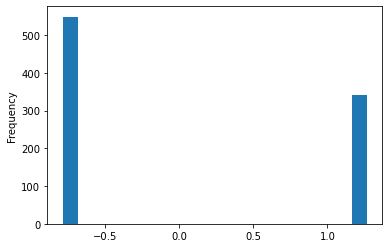

In [517]:
pd.DataFrame(df_scaled)[0].plot(kind = 'hist', bins = 20) #survived

<AxesSubplot:ylabel='Frequency'>

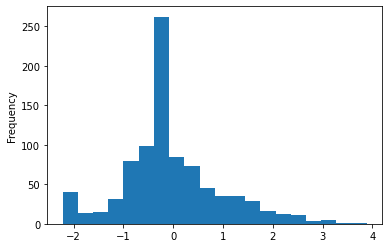

In [518]:
pd.DataFrame(df_scaled)[1].plot(kind = 'hist', bins = 20) #age

#since we filled the null values with median

<AxesSubplot:ylabel='Frequency'>

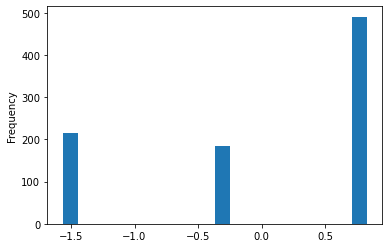

In [519]:
pd.DataFrame(df_scaled)[2].plot(kind = 'hist', bins = 20) #pclass

<AxesSubplot:ylabel='Frequency'>

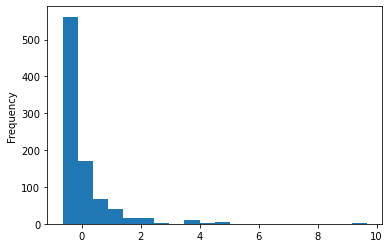

In [521]:
pd.DataFrame(df_scaled)[3].plot(kind = 'hist', bins = 20) #fare
#right skewed since all values are towards the left and it has some outliers after 4-6

**Min-Max Scaling** (works well with CNN in Deep learning):  <br>
* Min-max scaling scales the value between 0 and 1. <br>
* X_scaled = (X-X.min)/(X.max-X.min)

In [525]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [526]:
df_min_max_scaled = pd.DataFrame(min_max.fit_transform(df), columns = df.columns)
df_min_max_scaled.head()

,Survived,Age,Pclass,Fare
0,0.0,0.271174,1.0,0.014151
1,1.0,0.472229,0.0,0.139136
2,1.0,0.321438,1.0,0.015469
3,1.0,0.434531,0.0,0.103644
4,0.0,0.434531,1.0,0.015713


<AxesSubplot:ylabel='Frequency'>

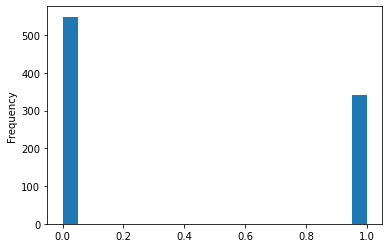

In [528]:
df_min_max_scaled['Survived'].plot(kind = 'hist', bins = 20) #discrere value

<AxesSubplot:ylabel='Frequency'>

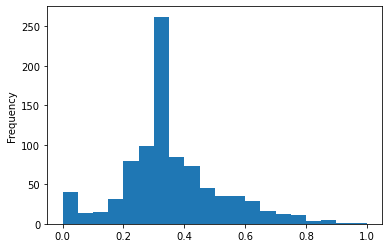

In [529]:
df_min_max_scaled['Age'].plot(kind = 'hist', bins = 20) #values scaled between 0 and 1

<AxesSubplot:ylabel='Frequency'>

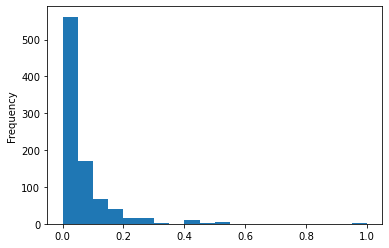

In [531]:
df_min_max_scaled['Fare'].plot(kind = 'hist', bins = 20) #values scaled between 0 and 1
#fare has outliers

**Robust scaler**<br>
It is used to scale the feature to median and quantiles. <br>
Scaling using median and quantiles consists of subtracting the median to all observations, and then dividing by interquantile differnce. The interquantile diff is the diff between 75th quantile and 25th quantile <br>

IQR = 75th percentile - 25th percentile <br>
X_scaled = (X- X.median)/IQR

0,1,2,3,4,5,6,7,8,9,10

90th percentile > 9 since there are 90% numbers that are less than 9 <br>
10th percentile > 1 since there is 10% numbers that are less than 1

In [535]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_robust_scaled.head()

,Survived,Age,Pclass,Fare
0,0.0,-0.461538,0.0,-0.312011
1,1.0,0.769231,-2.0,2.461242
2,1.0,-0.153846,0.0,-0.282777
3,1.0,0.538462,-2.0,1.673732
4,0.0,0.538462,0.0,-0.277363


<AxesSubplot:ylabel='Frequency'>

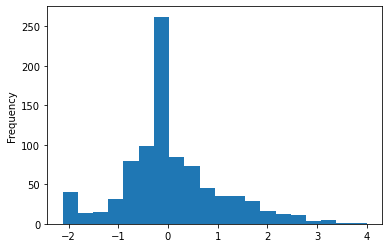

In [537]:
df_robust_scaled['Age'].plot(kind = 'hist', bins = 20)

<AxesSubplot:ylabel='Frequency'>

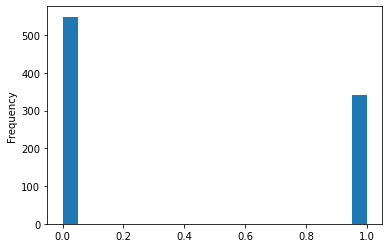

In [538]:
df_robust_scaled['Survived'].plot(kind = 'hist', bins = 20)

**Guassian Transformation** <br>

Some machine learning algorithms like Linear and Logistic regression assumes that data is normally distributed so converting our features into a Guassian distribution helps the algorithm to perform better 
* Logarithmic Transformation
* Reverse Transformation
* Square root Transformation
* Exponential Transformation
* Box cox Transformation

In [201]:
import scipy.stats as stat
import pylab

In [542]:
#comparing histogram with qq plot
def plot_data(df, variable):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df[variable].plot(kind = 'hist')
    plt.subplot(1,2,2)
    stat.probplot(df[variable], dist = 'norm',plot = pylab )

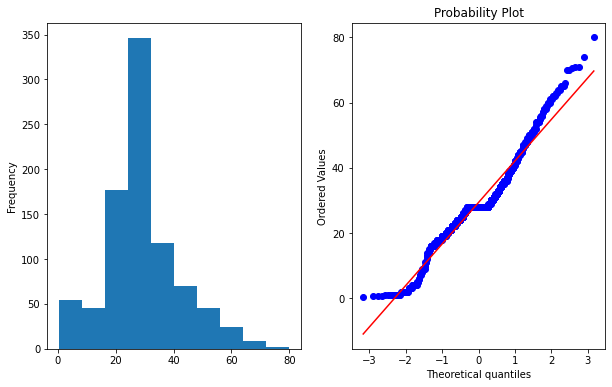

In [544]:
plot_data(df, 'Age') #normal dist (orignal)

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/2883805462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_log'] = np.log(df['Age'])


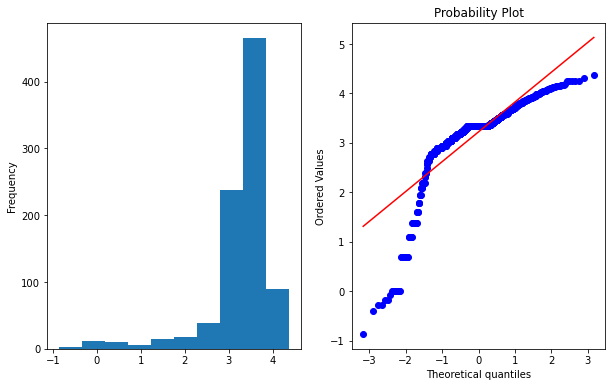

In [543]:
df['Age_log'] = np.log(df['Age'])

plot_data(df, 'Age_log') #logarithmic transformation

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3270340069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_reverse'] = 1/df['Age']


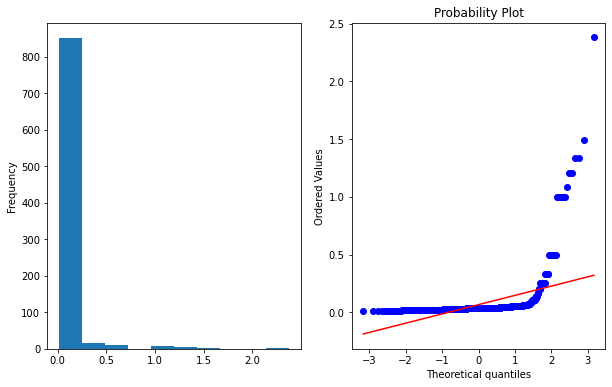

In [545]:
df['Age_reverse'] = 1/df['Age']

plot_data(df,'Age_reverse')  #reverse transformation

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/4061826171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_sqrt'] = df['Age']**(1/2)


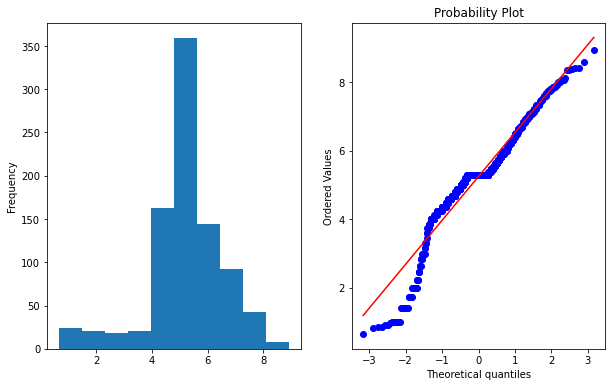

In [546]:
df['Age_sqrt'] = df['Age']**(1/2)

plot_data(df, 'Age_sqrt') #sqaure root transformation

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/2753957881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_exp'] = df['Age'] ** (1/1.2)


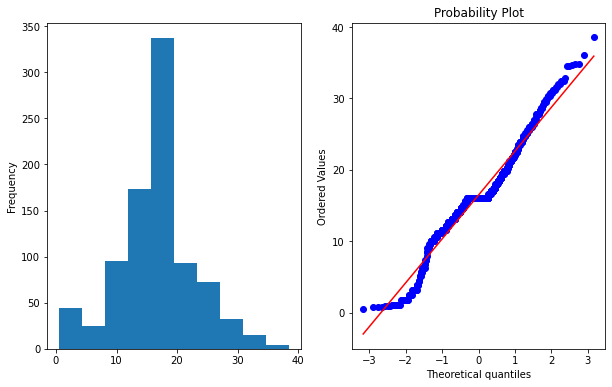

In [547]:
df['Age_exp'] = df['Age'] ** (1/1.2)

plot_data(df, 'Age_exp')  #exponential transformation

**Box Cox Transformation**



In [549]:
df['Age_boxcox'], parameters = stat.boxcox(df['Age'])

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3959278398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_boxcox'], parameters = stat.boxcox(df['Age'])


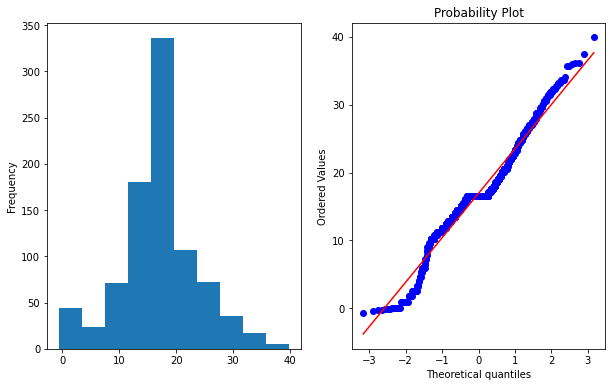

In [550]:
plot_data(df, 'Age_boxcox') #boxcox transformation

Note : Always use Logarithmic transformation when data is skewed

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/2914190968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare_log'] = np.log(df['Fare'] + 1)


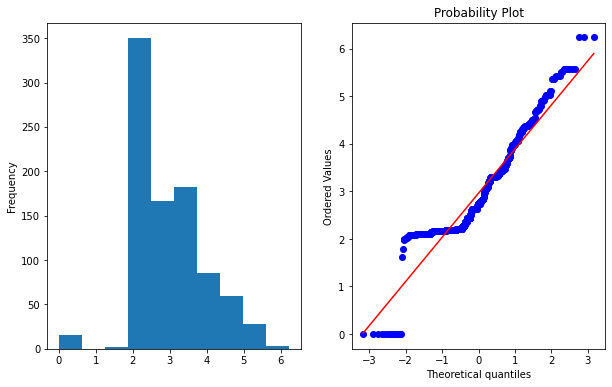

In [556]:
df['Fare_log'] = np.log(df['Fare'] + 1)

plot_data(df, 'Fare_log')

#log1p means log(1+x) it will not take in 0 and hence will not take infinite values 

In [558]:
df['Fare_boxcox'], parameters = stat.boxcox(df['Fare'] + 1)

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/1635419821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare_boxcox'], parameters = stat.boxcox(df['Fare'] + 1)


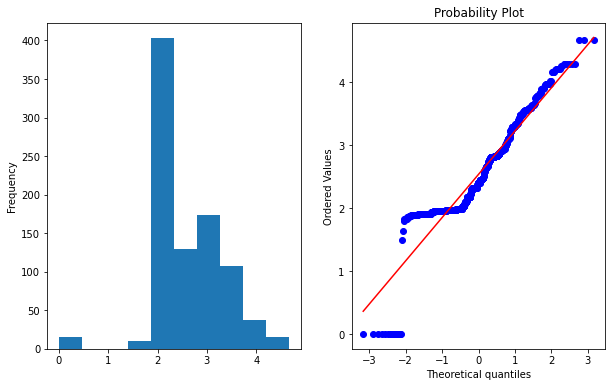

In [559]:
plot_data(df, 'Fare_boxcox')

**Handling Imbalanced Dataset**

In [561]:
df = pd.read_csv('creditcard.csv')

In [562]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [563]:
df.shape

(284807, 31)

In [565]:
df['Class'].value_counts() #highly imbalanced dataset

0    284315
1       492
Name: Class, dtype: int64

In [568]:
X = df.drop('Class', axis = 1)
Y = df['Class']

In [577]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [584]:
log_clf = LogisticRegression()
cv = KFold(n_splits = 10, shuffle = False)
param = {'C': 10.0**np.arange(10), 'penalty' : ['l1', 'l2']}

In [585]:
clf = GridSearchCV(log_clf, param_grid = param, n_jobs = -1, cv = cv)

In [586]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [587]:
clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.99886765        nan 0.99888521        nan 0.9988896
        nan 0.99887204        nan 0.99893349        nan 0.99895543
        nan 0.99887643        nan 0.99889399        nan 0.99889837
        nan 0.99889837]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09]),
                         'penalty': ['l1', 'l2']})

In [594]:
Y_pred = clf.predict(X_test)

print(accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))
print(confusion_matrix(Y_pred,Y_test)) #70% accuracy for fraud transactions in basic models on imbalanced dataset

#plot_confusion_matrix(clf, X_test, Y_test)

0.9989115550718023
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.64      0.70      0.67        90

    accuracy                           1.00     56962
   macro avg       0.82      0.85      0.83     56962
weighted avg       1.00      1.00      1.00     56962

[[56837    35]
 [   27    63]]


In [617]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [593]:
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [601]:
# #increasing the class weight in randomclassifier 

# class_weight = dict({0: 1, 1: 100})

# classifier = RandomForestClassifier(class_weight = class_weight)

# classifier.fit(X_train, Y_train)

# Y_pred = classifier.predict(X_test)

# print(accuracy_score(Y_pred, Y_test))
# print(classification_report(Y_pred, Y_test))
# print(confusion_matrix(Y_pred,Y_test)) #80% accuracy for fraud transactions in random forest #(decision tree performs better when dataset is imbalanced)
# plot_confusion_matrix(classifier, X_test, Y_test)

0.9995962220427653
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56881
           1       0.80      0.96      0.87        81

    accuracy                           1.00     56962
   macro avg       0.90      0.98      0.94     56962
weighted avg       1.00      1.00      1.00     56962

[[56861    20]
 [    3    78]]


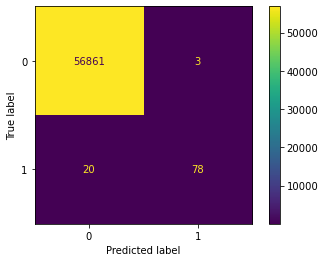

In [600]:
Y_pred = classifier.predict(X_test)

print(accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))
print(confusion_matrix(Y_pred,Y_test)) #80% accuracy for fraud transactions in random forest #(decision tree performs better when dataset is imbalanced)
plot_confusion_matrix(classifier, X_test, Y_test)

0.9996313331694814
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56883
           1       0.80      0.99      0.88        79

    accuracy                           1.00     56962
   macro avg       0.90      0.99      0.94     56962
weighted avg       1.00      1.00      1.00     56962

[[56863    20]
 [    1    78]]


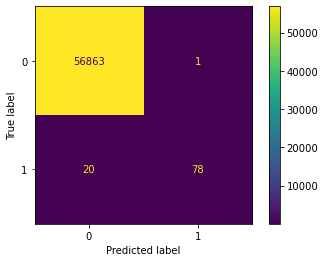

In [595]:
Y_pred = classifier.predict(X_test)

print(accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))
print(confusion_matrix(Y_pred,Y_test)) #80% accuracy for fraud transactions in random forest #(decision tree performs better when dataset is imbalanced)
plot_confusion_matrix(classifier, X_test, Y_test)

**1. Undersampling**

Pick up enough records which can be sampled againts Fraudlent transactions (i.e. 0 is equal to 347). But since this would cut short our records (transaction count), it would lead to bad prediction

In [607]:
X.shape

(284807, 30)

In [608]:
Y.shape

(284807,)

In [609]:
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [612]:
df[df['Class'] == 0].shape

(284315, 31)

In [615]:
df1 = df[df['Class'] == 0].sample(492)
df2 = df[df['Class'] == 1]

df3 = pd.concat([df1, df2], axis = 0)
X = df3.drop('Class', axis =1)
Y = df3['Class']

In [616]:
Y.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [622]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [623]:
classifier.fit(X_train, Y_train)

RandomForestClassifier()

0.934010152284264
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       103
           1       0.91      0.96      0.93        94

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197

[[94  9]
 [ 4 90]]


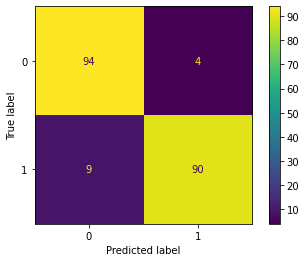

In [624]:
Y_pred = classifier.predict(X_test)

print(accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))
print(confusion_matrix(Y_pred,Y_test))   #our precision has not increased since we cut short our samples 
plot_confusion_matrix(classifier, X_test, Y_test)

**2.Oversampling**

We increase the size of class which has less number of records to make up for the imbalanced dataset using in-build library 

In [625]:
# Resampler: The fit_resample method resample the data and targets into a dictionary
# with a key-value pair of data_resampled and targets_resampled.

# from imblearn.under_sampling import RandomUnderSampler
# us = RandomUnderSampler(ratio  = 0.5)
# X_us, Y_us = us.fit_resample(X_train, Y_train)

# from imblearn.over_sampling import RandomOverSampler  #it creates oversample based on exisiting points 
# os = RandomOverSampler(ratio = 0.8)
# X_os, Y_os = os.fit_resample(X_train, Y_train)
# classifier.fit(X_os, Y_os)
# Y_pred = classifier.predict(X_test)
# classification_report(Y_pred, Y_test)

# from imblearn.combine import SMOTTomek  #smot creates new points of lower class altogether based on nearest neighbours
# sm = SMOTTomek()
# X_sm, Y_sm - sm.fit_sample(X_train, Y_train)
# classifier.fit(X_sm, Y_sm)

# from imblearn.ensemble import EasyEnsembleClassifier  
# ee = EasyEnsembleClassifier()
# ee.fit(X_train, Y_train)
# Y_pred = ee.predict(X_test)
# classification_report(Y_pred, Y_test)

# https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.EasyEnsembleClassifier.html

**Handling Outliers**

**Which machine learning are sensitive to outliers?**

1. Naive Bayes > Not sensitive
2. SVM  > Not sensitive
3. Linear Regression > Sensitive (Least sqaure distance b/w fit and points)
4. Logistic Regression > Sensitive 
5. Decision Tree Regressor or Classifier > Not sensitive
6. Ensemble (RF, XGBoost, GB) > Not sensitive
7. KNN > Sensitive (nearest neighbour eucleadian distance)
8. Clustering(Kmeans, Hierachrical, DB Scan) > Sensitive (neighbour eucledian distance)
9. PCA > v sensitive
10. Neural network > sensitive

In [628]:
df = titanic_df[['Fare', 'Age', 'Survived']]
df.head()

,Fare,Age,Survived
0,7.2500,22.0,0
1,71.2833,38.0,1
2,7.9250,26.0,1
3,53.1000,35.0,1
4,8.0500,35.0,0


Treating outliers for Normally distrubted features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

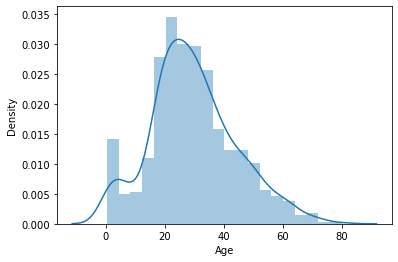

In [629]:
sns.distplot(df['Age'])

Text(0.5, 1.0, 'Age distribution')

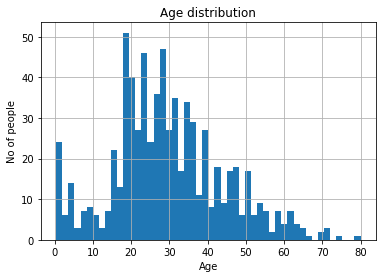

In [632]:
ax = df['Age'].hist(bins = 50)
ax.set_xlabel('Age')
ax.set_ylabel('No of people')
ax.set_title('Age distribution')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

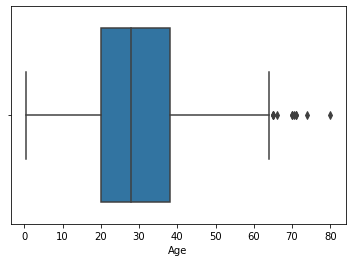

In [648]:
sns.boxplot(df['Age'])  #use boxplot to detect outliers 

In [633]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Z-scores** 

https://articles.outlier.org/z-score-formula-examples-and-how-to-interpret

For example, a Z-score of 1.2 shows that your observed value is 1.2 standard deviations from the mean. A Z-score of 2.5 means your observed value is 2.5 standard deviations from the mean and so on. The closer your Z-score is to zero, the closer your value is to the mean. The further away your Z-score is from zero, the further away your value is from the mean. Typically, you will not see Z-scores that are more than 3 standard deviations from the mean. This is because most data points lie within 3 standard deviations of the mean. Any data point with z score of >3 is an outlier since 99.7% of data lies within the upper and lower boundary.  Z-score = (x-x.mean)/std

In [636]:
#in case of Gaussian distribution, anything that falls outside 3rd std away from mean, it is an outlier

upper_boundary = df['Age'].mean() + 3*df['Age'].std()
lower_boundary = df['Age'].mean() - 3*df['Age'].std()

print(upper_boundary,lower_boundary, df['Age'].mean()) #anything above 73 is an outlier 

73.27860964406095 -13.88037434994331 29.69911764705882


Treating outliers when feature is skewed

Text(0.5, 1.0, 'Fare distribution')

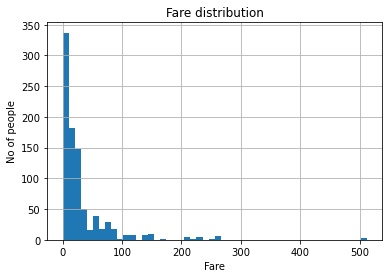

In [647]:
ax = df['Fare'].hist(bins = 50)
ax.set_xlabel('Fare')
ax.set_ylabel('No of people')
ax.set_title('Fare distribution')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

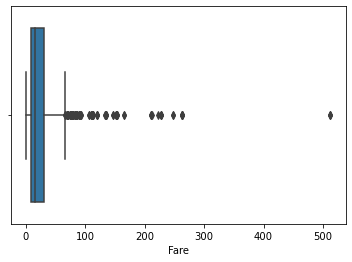

In [649]:
sns.boxplot(df['Fare'])

In [650]:
df['Fare'].describe() #max value goes upto 512 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [651]:
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
IQR

23.0896

In [652]:
upper_boundary = df['Fare'].quantile(0.75) + IQR*1.5
lower_boundary = df['Fare'].quantile(0.25) - IQR*1.5
print(upper_boundary,lower_boundary, df['Fare'].mean())  #anything above 65 will be an outlier
#but we have some data points in 100-200 which are not outliers 

65.6344 -26.724 32.2042079685746


<AxesSubplot:>

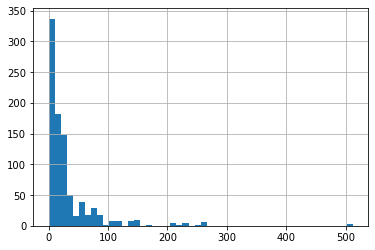

In [653]:
df['Fare'].hist(bins = 50) #since our data is right skewed, we should take extreme outliers 

In [654]:
upper_boundary = df['Fare'].quantile(0.75) + IQR*3
lower_boundary = df['Fare'].quantile(0.25) - IQR*3
print(upper_boundary,lower_boundary, df['Fare'].mean())  #so here anything above 100 is an outlier
#negative boundary will not be considered since age can't be negative

100.2688 -61.358399999999996 32.2042079685746


Treating outliers 

In case of Age, anyone ageing > 73 years is an outliers
In case of Fare, fare >100 is an outlier 

> we can remove them or replace them with the highest value 

In [664]:
df[df['Age']> 73] = 73
df[df['Fare']> 100] = 100

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3491431017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Age']> 73] = 73
C:\Users\ngupt240\AppData\Local\Temp/ipykernel_27584/3491431017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Fare']> 100] = 100


<AxesSubplot:>

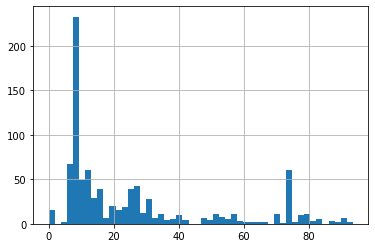

In [667]:
df['Fare'].hist(bins = 50)  #now our values lie between 25th and 75th percentile and outliers have been treated 

### Exploratory Data Analysis

In [7]:
housing_df = pd.read_csv('regression_housing.csv')

In [8]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#pd.pandas.set_option('display.max_columns', None)................

In [9]:
housing_df.shape

(1460, 81)

**In EDA, we will cover :** <br>
    * Identifying missing values <br>
    * Numerical values <br>
    * Distribution of numerical features <br>
    * Cardinality of categorical features <br>
    * Outliers <br>
    * Relationship b/w Independent features and Dependant features (Sales Price) <br>

**Missing values**

In [33]:
#identifying null features
feature_with_na = [feature for feature in housing_df.columns if housing_df[feature].isnull().sum() >1 ]

#calculating null percentage 
for i in feature_with_na:
    print(i,'has', np.round(housing_df[i].isnull().mean(),2), '% missing values')

LotFrontage has 0.18 % missing values
Alley has 0.94 % missing values
MasVnrType has 0.01 % missing values
MasVnrArea has 0.01 % missing values
BsmtQual has 0.03 % missing values
BsmtCond has 0.03 % missing values
BsmtExposure has 0.03 % missing values
BsmtFinType1 has 0.03 % missing values
BsmtFinType2 has 0.03 % missing values
FireplaceQu has 0.47 % missing values
GarageType has 0.06 % missing values
GarageYrBlt has 0.06 % missing values
GarageFinish has 0.06 % missing values
GarageQual has 0.06 % missing values
GarageCond has 0.06 % missing values
PoolQC has 1.0 % missing values
Fence has 0.81 % missing values
MiscFeature has 0.96 % missing values


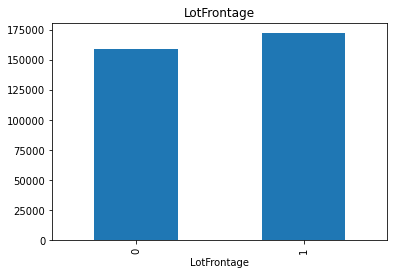

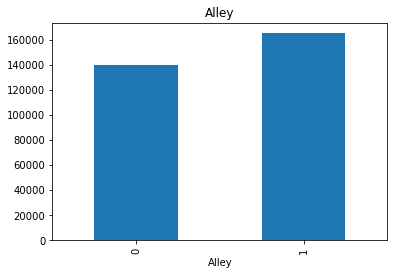

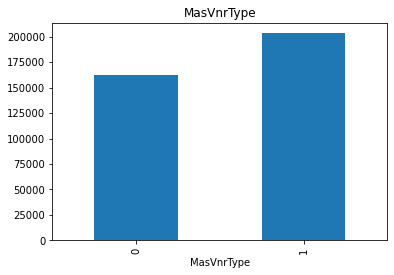

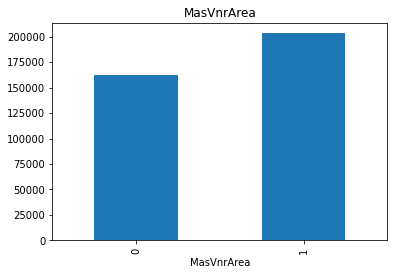

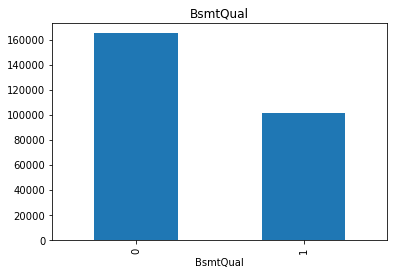

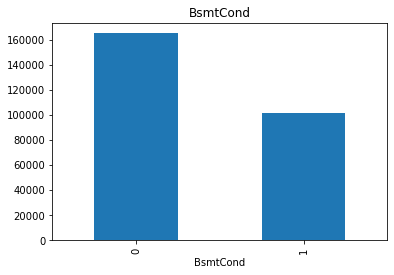

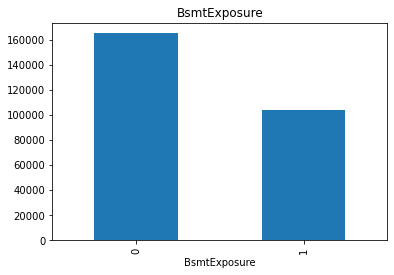

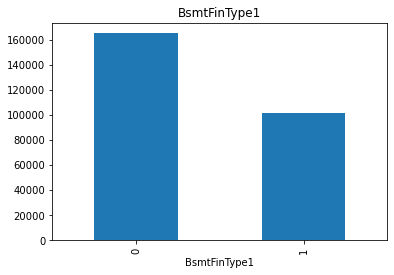

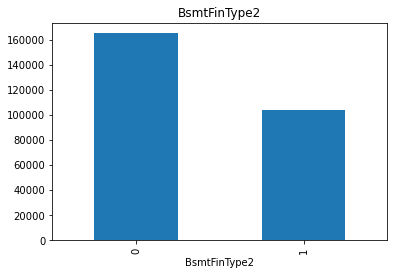

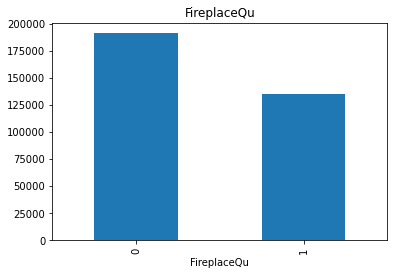

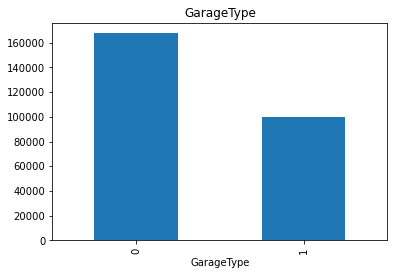

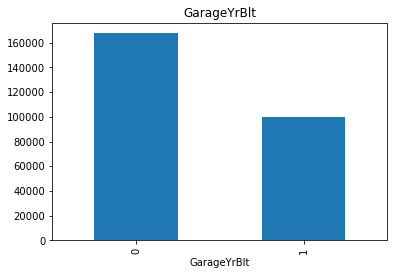

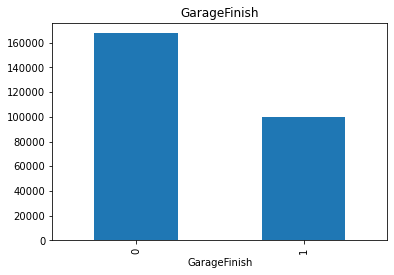

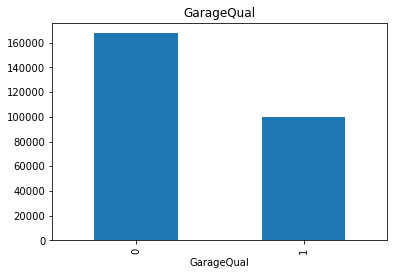

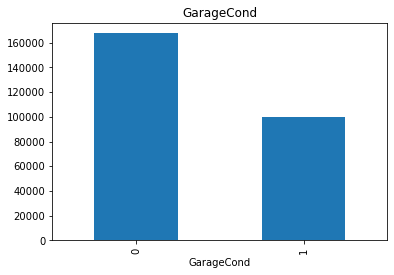

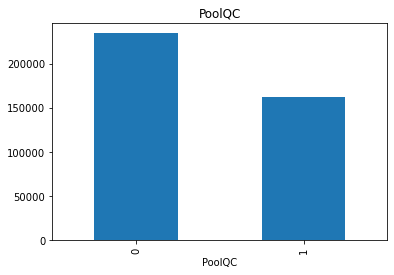

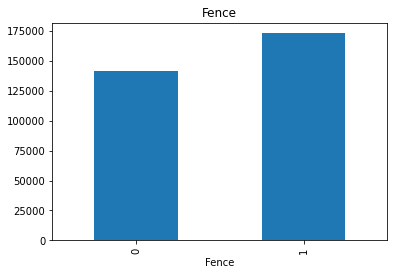

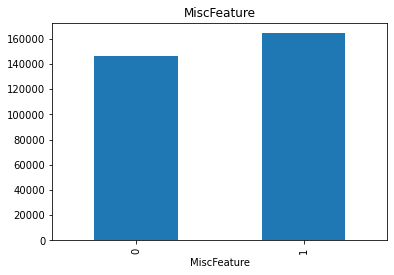

In [59]:
for feature in feature_with_na:
    
    data = housing_df.copy()
    
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(by = feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here with the relation b/w the missing values and dependant variable "Sale price" is clearly visible (directly proportional) We need to replace these nan value with something meanginful as discussed in Feature Engineering section. 

In [62]:
housing_df['Id'].nunique() #we have 1460 unique values in this ID column for each transaction so we don't need it 

1460

**Numerical variables**

In [75]:
#identifying numerical variables 

feature_num = [feature for feature in housing_df.columns if housing_df[feature].dtypes != 'O'] #housing_df['MSZoning'].dtype

#length of numerical features 
print("Number of Numerical features in dataset", len(feature_num))

#printing out numerical features

housing_df[feature_num].head()

Number of Numerical features in dataset 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


**Temporal variables**

From the dataset we have 4 year variables like YearBuilt, YearRemodAd, etc. which have "int" or "float" datatype. We have to extact information like number of years, days from these datetime features. One example like difference in the number of years built and number of years sold. To analyse this further let's extract only year columns 

In [102]:
feature_with_year = [feature for feature in housing_df.columns if "Yr" in feature or "Year" in feature]
# [feature for feature in housing_df.columns if 'overall' in feature.lower()]

for feature in feature_with_year:
    print(feature, housing_df[feature].nunique())

YearBuilt 112
YearRemodAdd 61
GarageYrBlt 97
YrSold 5


<AxesSubplot:xlabel='YrSold'>

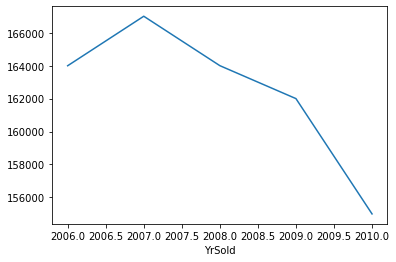

In [106]:
#checking the relationship b/w year sold and sales price

housing_df['YrSold'].unique()

housing_df.groupby(by = 'YrSold')['SalePrice'].median().plot(kind = 'line')

In [108]:
housing_df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [109]:
housing_df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [110]:
housing_df['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

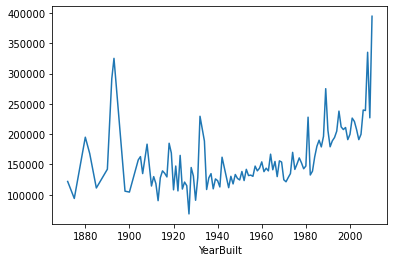

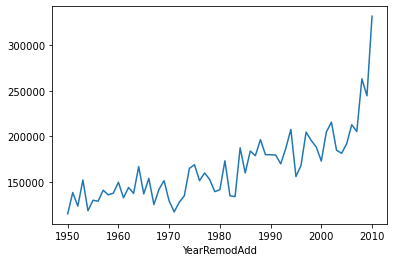

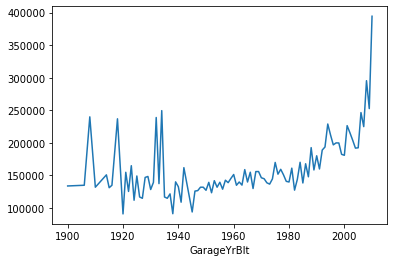

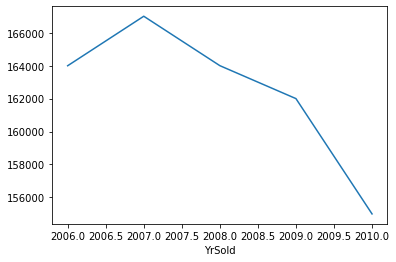

In [111]:
for feature in feature_with_year :
    data = housing_df.copy()
    data.groupby(feature)['SalePrice'].median().plot(kind = 'line')
    plt.show()

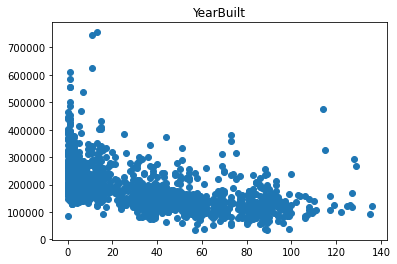

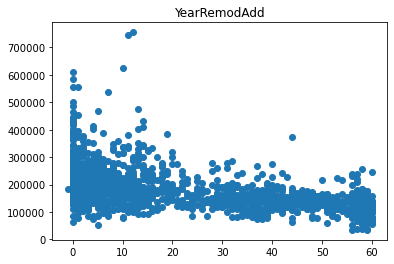

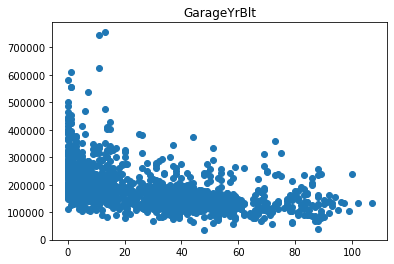

In [119]:
#calculating the number of years b/w year sold and other year variables to see if age led to decrease in saleprice 

for feature in feature_with_year:
    if feature != 'YrSold':
        data = housing_df.copy()
        data[feature] = data['YrSold'] - data[feature]
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.title(feature)
        plt.show()

In [123]:
housing_df[feature_num].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


**Discrete Numerical variables**

In [175]:
#numerical values can be continous or discrte (categorical columns)
#not considering years since they are temporal variables(years) and ID

#discrete features where unique values are less than 25 
discrete_features = [feature for feature in feature_num if (housing_df[feature].nunique() < 25)
                      and feature not in feature_with_year and feature != 'Id']
print('Number of discrete features: ', len(discrete_features))

Number of discrete features:  17


In [176]:
housing_df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


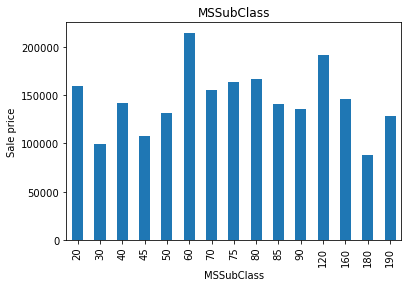

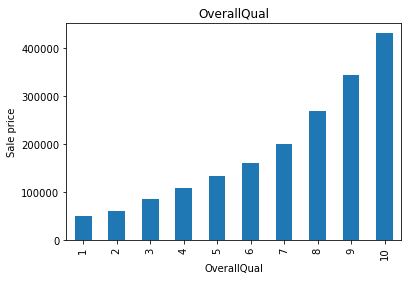

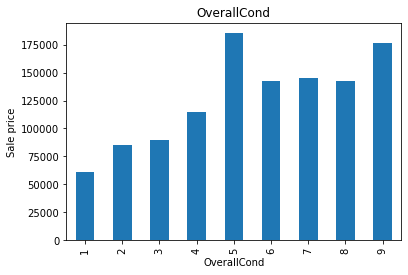

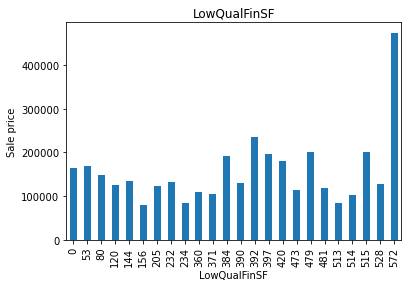

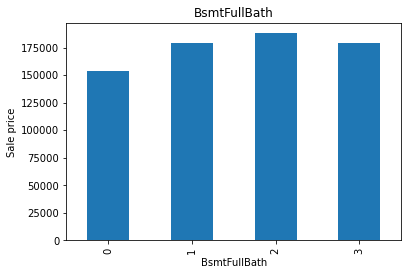

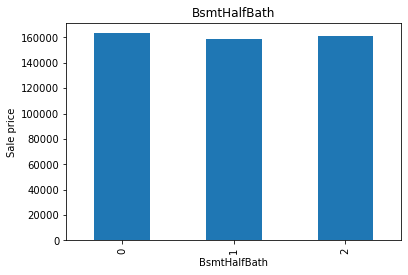

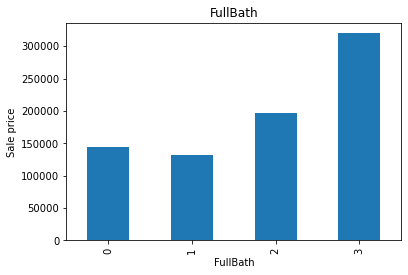

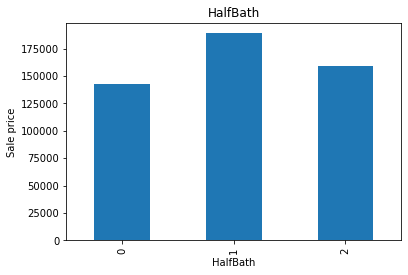

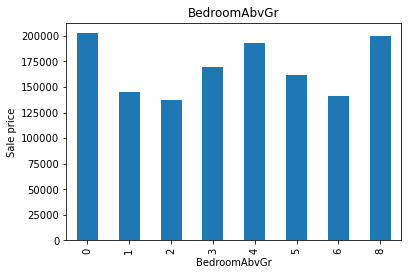

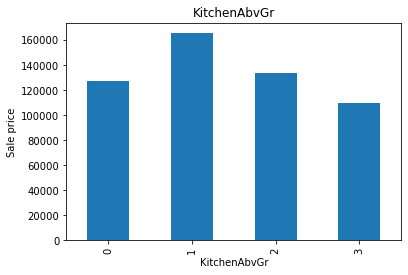

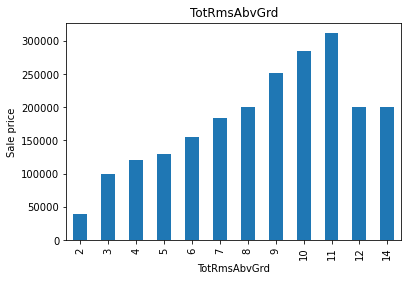

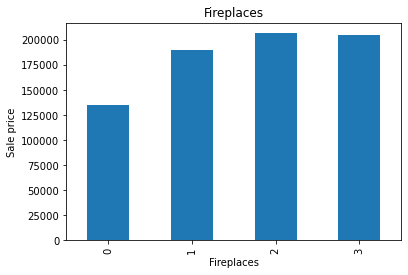

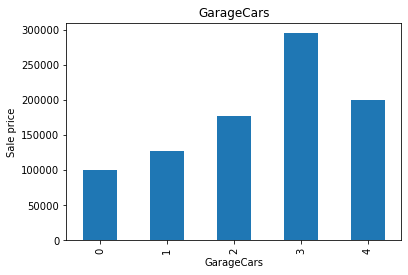

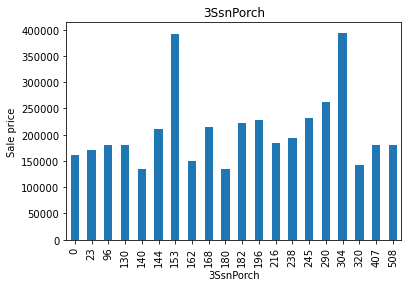

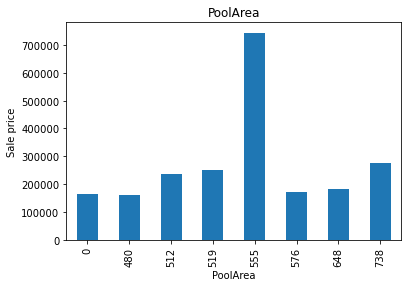

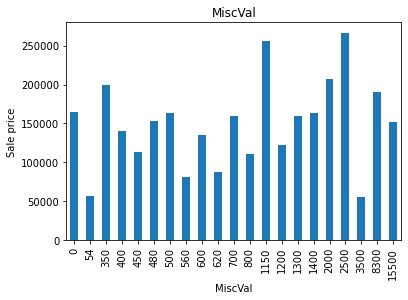

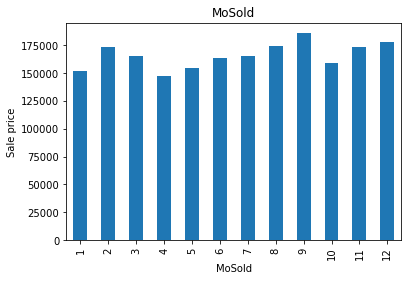

In [178]:
for feature in discrete_features:
    data = housing_df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale price')
    plt.title(feature)
    plt.show()

**Continous Numerical variables**

In [185]:
#numerical features in respect to continous variable 
#unique values > 25 , not part of year feature and ID column
continous_feature = [feature for feature in feature_num if feature not in discrete_features+feature_with_year+['Id']]
print('Nunber of continous features:', len(continous_feature))

Nunber of continous features: 16


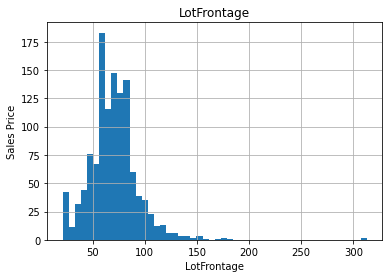

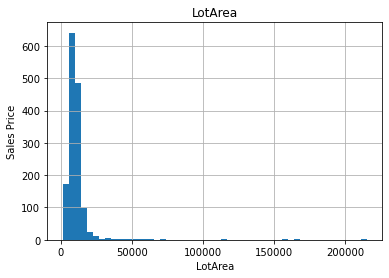

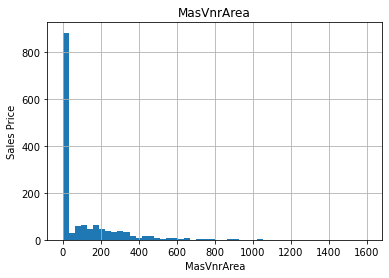

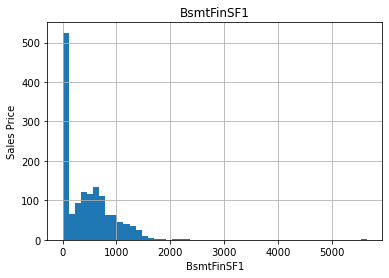

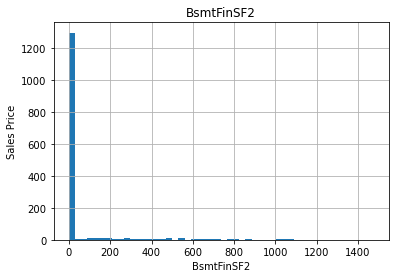

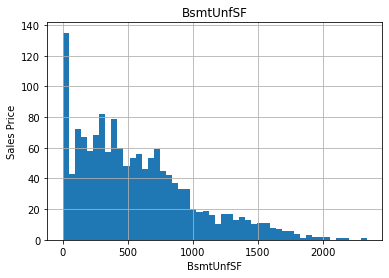

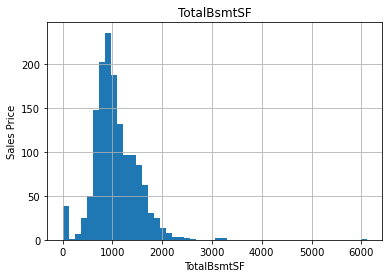

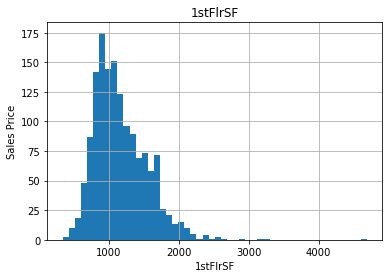

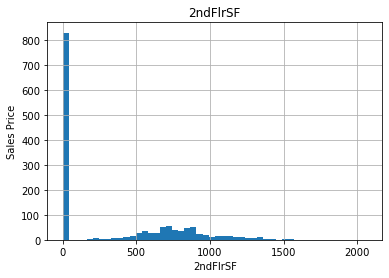

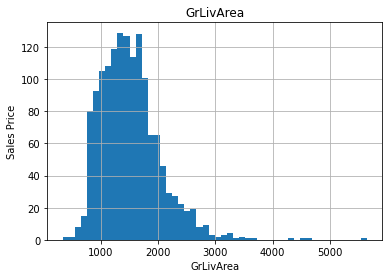

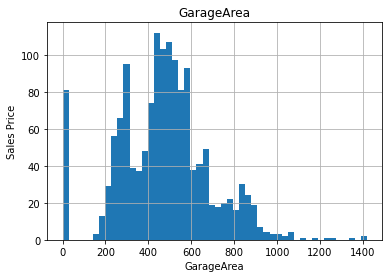

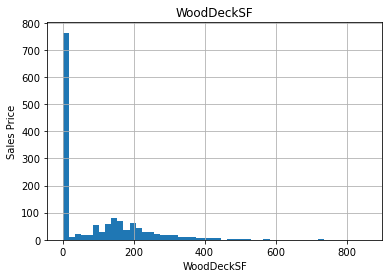

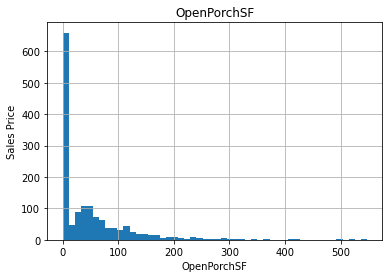

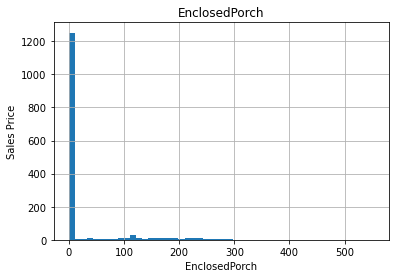

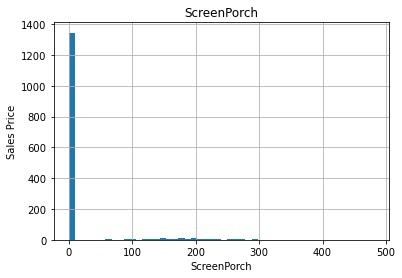

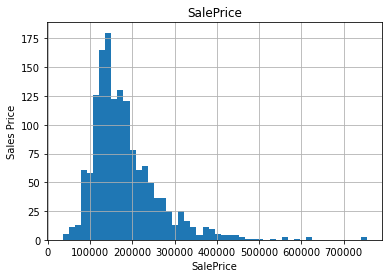

In [202]:
#plotting continous features

for feature in continous_feature:
    data = housing_df.copy()
    data[feature].hist(bins = 50)
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()

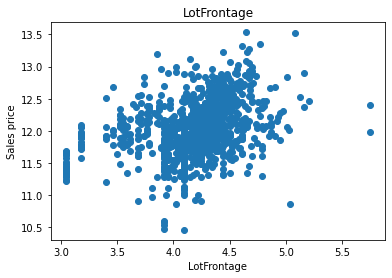

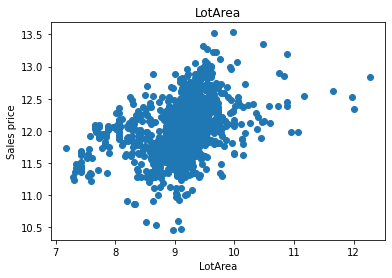

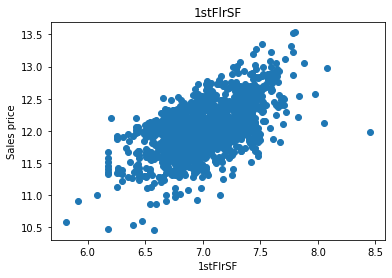

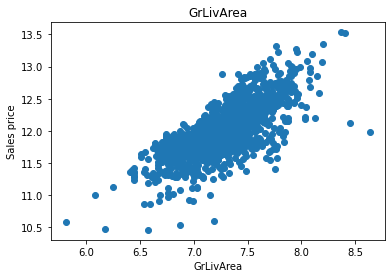

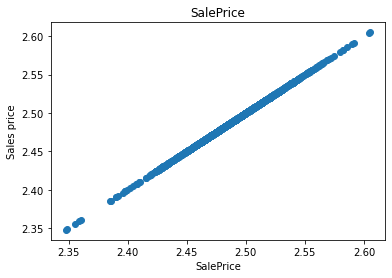

In [210]:
#since some features do not follow gaussian distribution we can perform log transformation 

for feature in continous_feature:
    data = housing_df.copy()
    if 0 in data[feature].unique():  #if unique value is 0 in any column pass it through since log(0) is 1 
        pass
    else :
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('Sales price')
        plt.show()
        
# a = 3
# if a>5:
#     pass
# else 
#     print('a is less than 10')
    
#     #pass statement is used as a null statement
#     #so if a condition is true nothing happens 

# data = housing_df.copy() #if something changes in data ,nothing chnages in housing_df
# data = housing_df #if something changes in data then it gets reflected in housig



**Outliers**

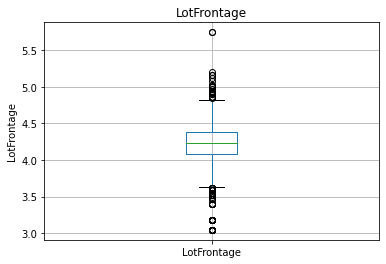

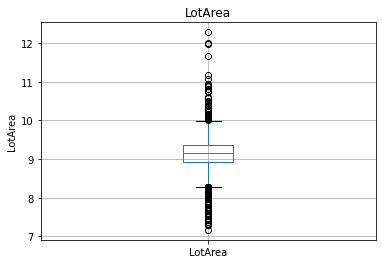

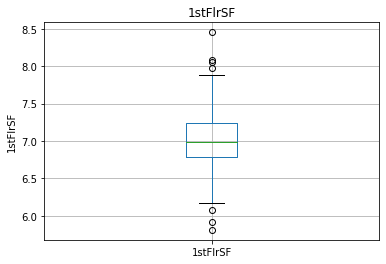

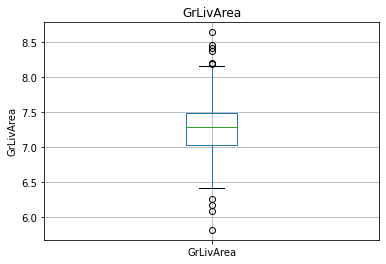

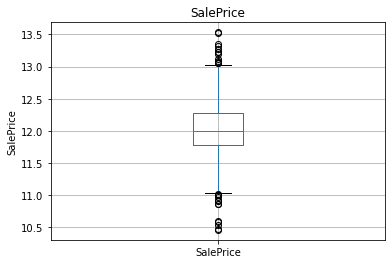

In [219]:
for feature in continous_feature:
    data = housing_df.copy()
    if 0 in data[feature].unique():
        pass
    else :
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
#outliers on normally distributed features are 3 std away from mean 
# since we have already transformed our features in normal dist box plot can be used to get outliers 

**Categorical features**

In [226]:
categorical_feature = [feature for feature in housing_df.columns if housing_df[feature].dtypes == 'O']
print('Number of categorical features :', len(categorical_feature))
housing_df[categorical_feature].head()

Number of categorical features : 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [243]:
#number of unique features in each categorical features (cardinality)

for feature in categorical_feature:
    print('The feature is {} and number of unique categories are {}'.format(feature, housing_df[feature].nunique()))
    
#for features <5 we can perform one hot encoding in feature engineering but for >5 we will have to check how to encode them 

The feature is MSZoning and number of unique categories are 5
The feature is Street and number of unique categories are 2
The feature is Alley and number of unique categories are 2
The feature is LotShape and number of unique categories are 4
The feature is LandContour and number of unique categories are 4
The feature is Utilities and number of unique categories are 2
The feature is LotConfig and number of unique categories are 5
The feature is LandSlope and number of unique categories are 3
The feature is Neighborhood and number of unique categories are 25
The feature is Condition1 and number of unique categories are 9
The feature is Condition2 and number of unique categories are 8
The feature is BldgType and number of unique categories are 5
The feature is HouseStyle and number of unique categories are 8
The feature is RoofStyle and number of unique categories are 6
The feature is RoofMatl and number of unique categories are 8
The feature is Exterior1st and number of unique categorie

([<matplotlib.patches.Wedge at 0x1a1525565b0>,
 [Text(-0.48963563325447157, 0.9850162164388426, 'Attchd'),
  Text(0.27828454189043367, -1.0642169486269384, 'Detchd'),
  Text(1.0768445273636815, -0.22451250274069226, 'BuiltIn')],
 [Text(-0.2670739817751663, 0.537281572603005, '64.68%'),
  Text(0.1517915683038729, -0.58048197197833, '28.77%'),
  Text(0.5873697421983717, -0.12246136513128668, '6.54%')])

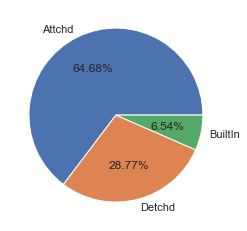

In [270]:
# housing_df['GarageType'].value_counts().index

garage_names = housing_df['GarageType'].value_counts().index
garage_values = housing_df['GarageType'].value_counts().values

#top 3
plt.pie(x = garage_values[:3], labels = garage_names[:3], autopct = '%1.2f%%')

#most of the garage type are of attached with houses which makes up the distribution 

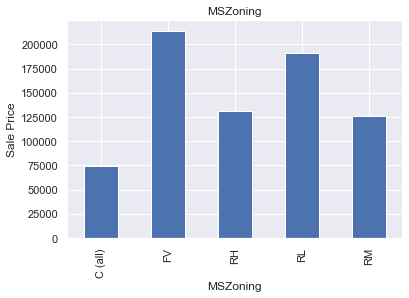

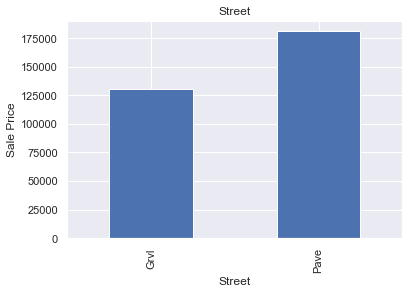

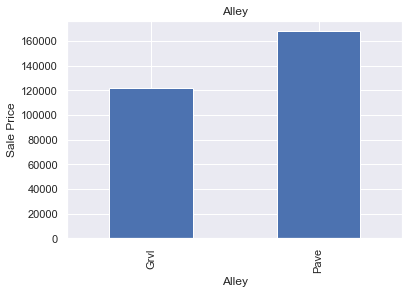

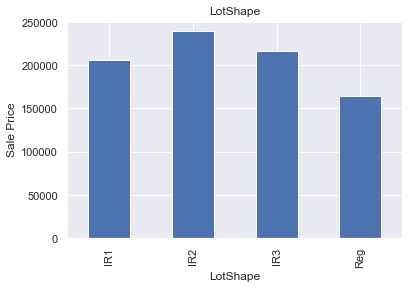

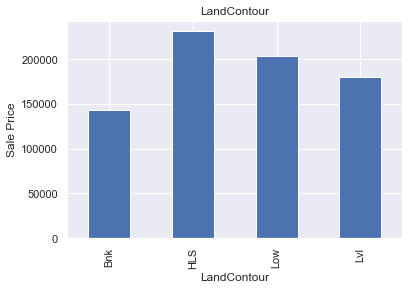

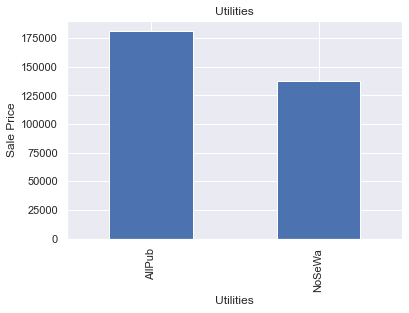

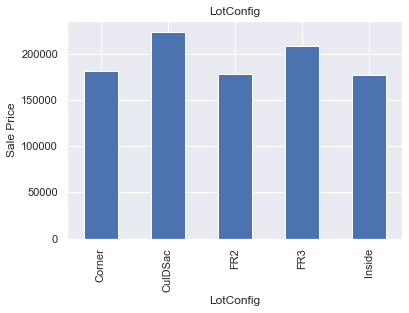

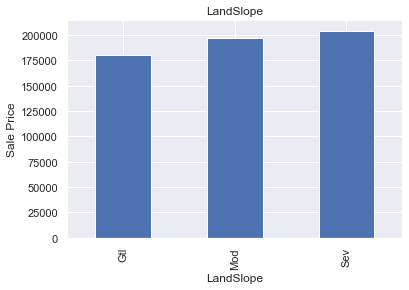

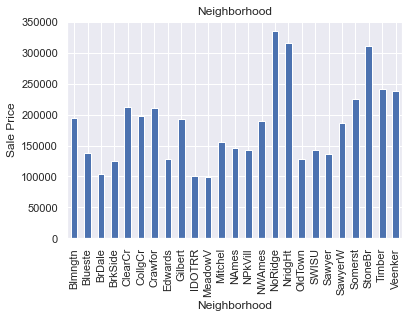

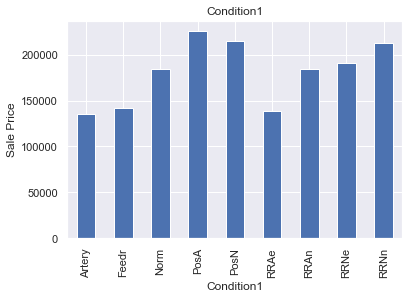

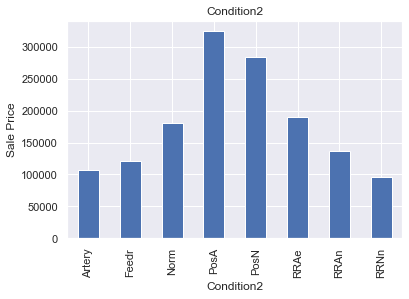

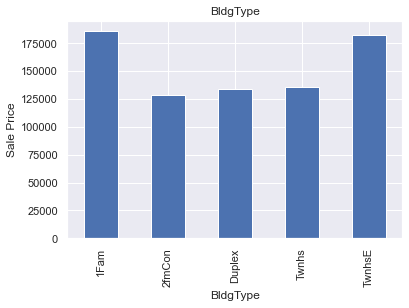

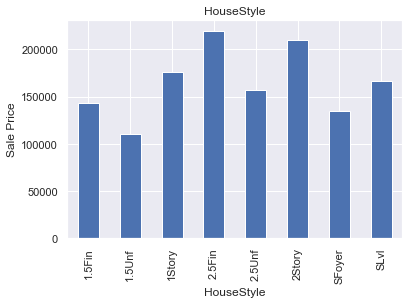

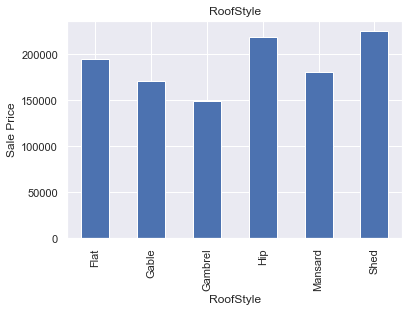

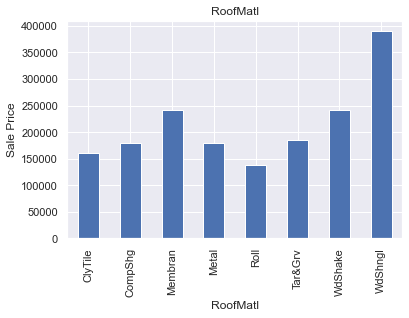

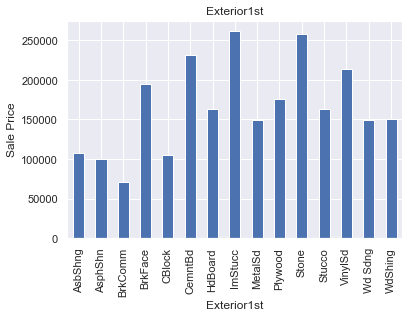

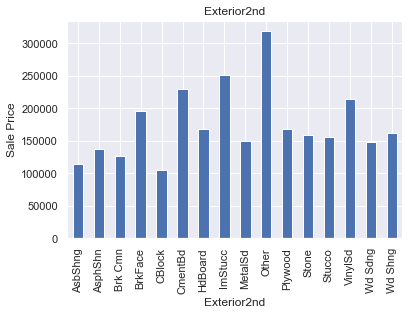

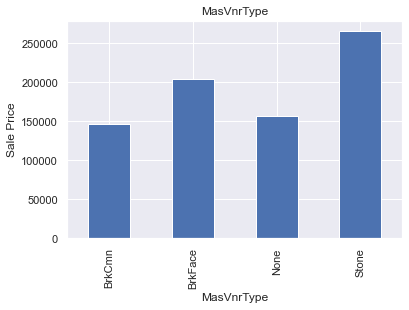

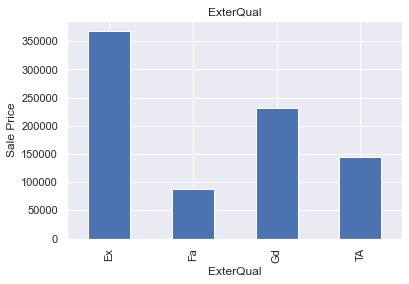

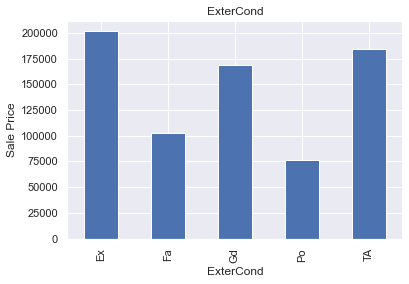

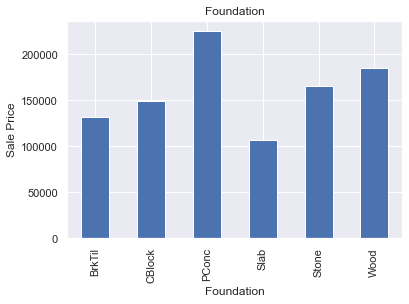

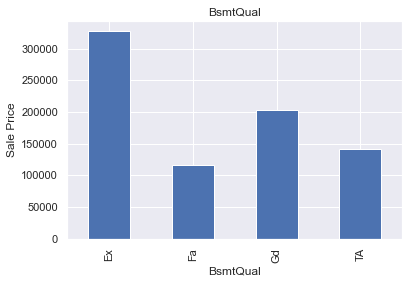

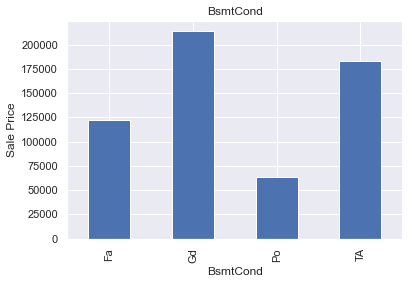

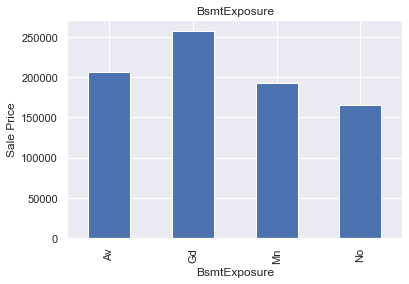

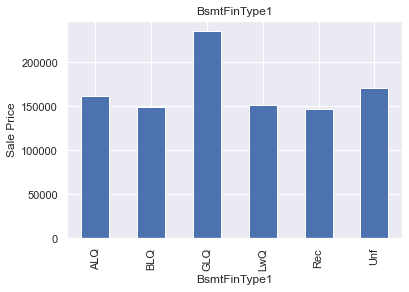

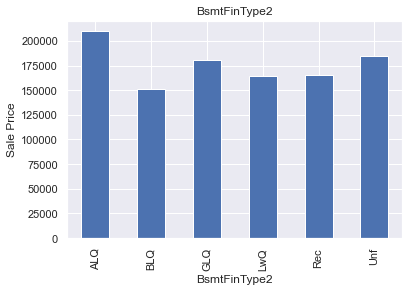

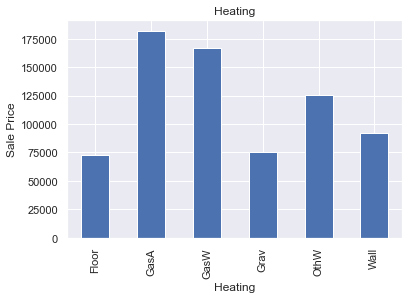

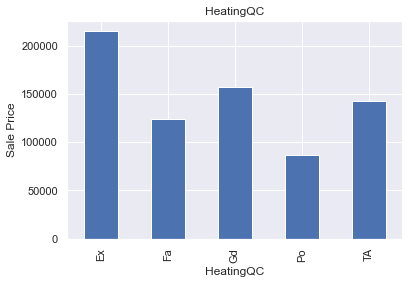

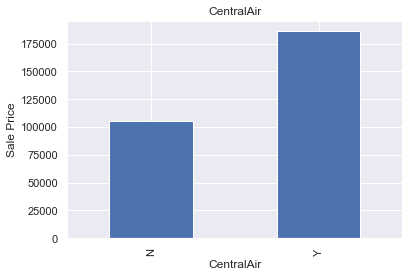

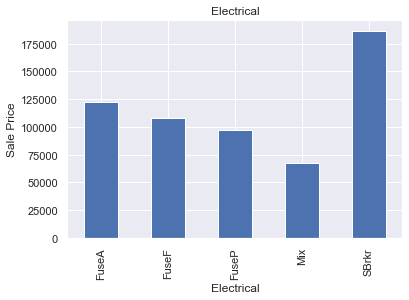

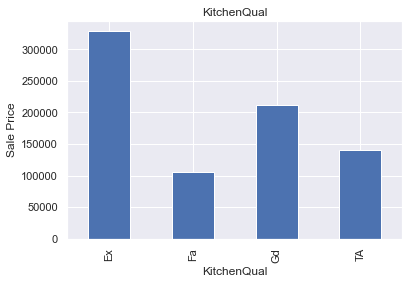

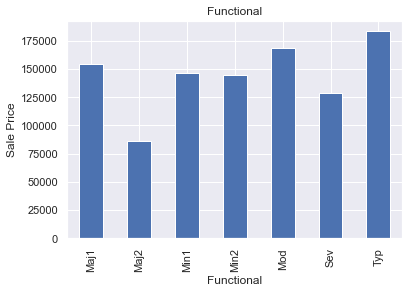

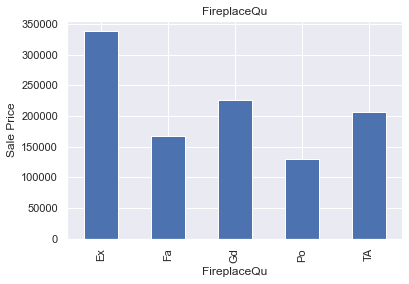

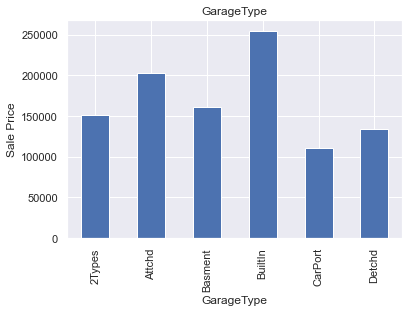

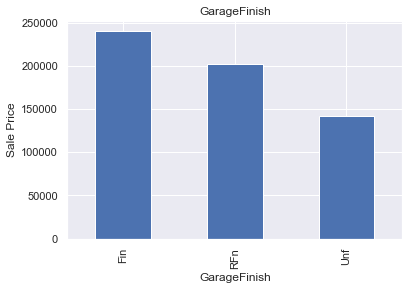

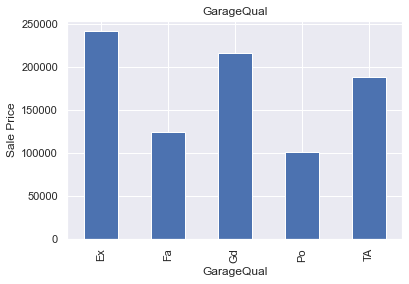

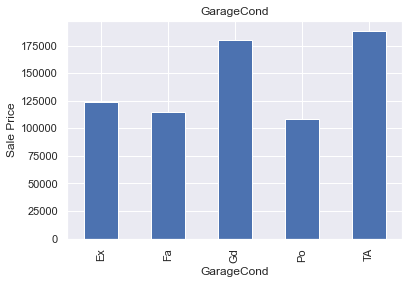

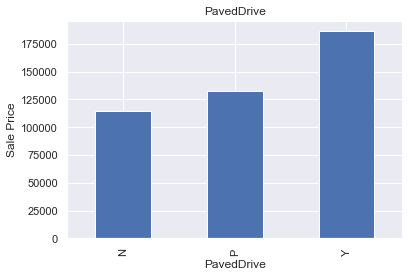

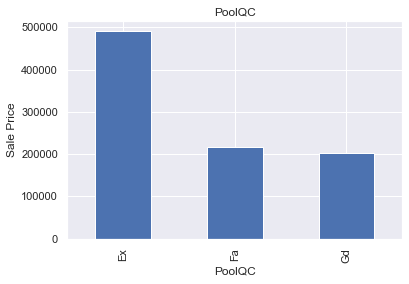

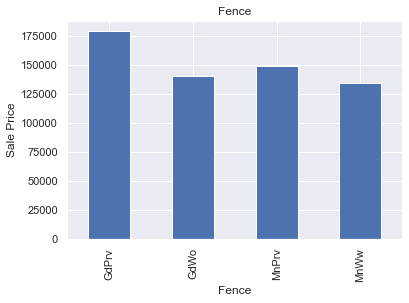

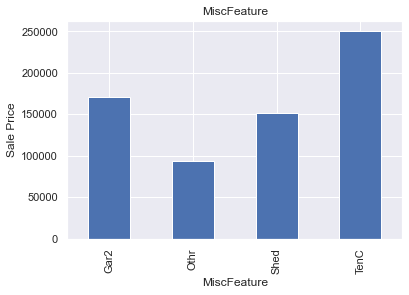

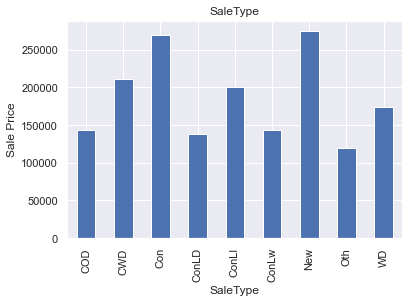

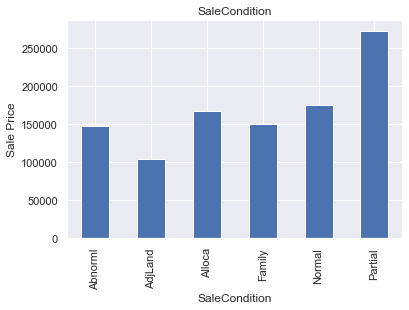

In [249]:
for feature in categorical_feature :
    data = housing_df.copy()
    data.groupby(feature)['SalePrice'].mean().plot(kind = 'bar')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

### Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

**Dropping Constant Features**

In [303]:
X = pd.DataFrame([[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]], columns = {'A', 'B', 'C', 'D'})

In [304]:
X #column B is a constant feature with 0 variance

,D,A,C,B
0,0,2,0,3
1,0,1,4,3
2,0,1,1,3


Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [305]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0) #if variance is 0 in entire feature
var_thr.fit(X)

VarianceThreshold()

In [306]:
var_thr.get_support()  #where it is false they are constant

array([False,  True,  True, False])

In [313]:
X.columns[var_thr.get_support()]

Index(['A', 'C'], dtype='object')

In [321]:
constant_columns = [columns for columns in X.columns if columns not in X.columns[var_thr.get_support()]]

for columns in constant_columns:
    print(columns)

D
B


In [322]:
X.drop(constant_columns, axis = 1)

,A,C
0,2,0
1,1,4
2,1,1


In [323]:
var_thr.transform(X) #direct transform 

array([[2, 0],
       [1, 4],
       [1, 1]], dtype=int64)

In [324]:
santander_df = pd.read_csv('santander.csv')

In [325]:
santander_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [326]:
santander_df.shape  #371 columns let's check constant feauturses

(76020, 371)

In [328]:
#First, we will split the data into X and Y since this should only be run on Input variables 
X = santander_df.drop('TARGET', axis = 1)
Y = santander_df['TARGET']

In [329]:
X.shape

(76020, 370)

In [339]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.0)
var_thr.fit(X)

VarianceThreshold()

In [353]:
contant_features = [columns for columns in X.columns if columns not in X.columns[var_thr.get_support()]]
contant_features

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

In [354]:
X.drop(contant_features, axis = 1).head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var39,ind_var44_0,ind_var44,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var2

In [356]:
var_thr.transform(X) #direct trasnformation on test 

array([[1.00000000e+00, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 3.92051700e+04],
       [3.00000000e+00, 2.00000000e+00, 3.40000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 4.92780300e+04],
       [4.00000000e+00, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 6.73337700e+04],
       ...,
       [1.51835000e+05, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 7.40281500e+04],
       [1.51836000e+05, 2.00000000e+00, 2.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 8.42781600e+04],
       [1.51838000e+05, 2.00000000e+00, 4.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05]])

**Feature selection using Correlation**

In case if we have columns that are highly correlated to each other in Independent variables, we can drop one of them and take only one to avoid overfitting.

In [366]:
from sklearn.datasets import load_boston
data = load_boston()
boston_df = pd.DataFrame(data = data.data, columns = data.feature_names)
boston_df['MUD'] = data.target

In [367]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MUD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [368]:
#separating the independant and dependant variables 

X = boston_df.drop('MUD', axis = 1)
Y = boston_df['MUD']

In [369]:
X.shape 

(506, 13)

We can either separate the X in train and test split, perfom selection on train and then apply the same function on test or we can perform everything on X itself. 

<AxesSubplot:>

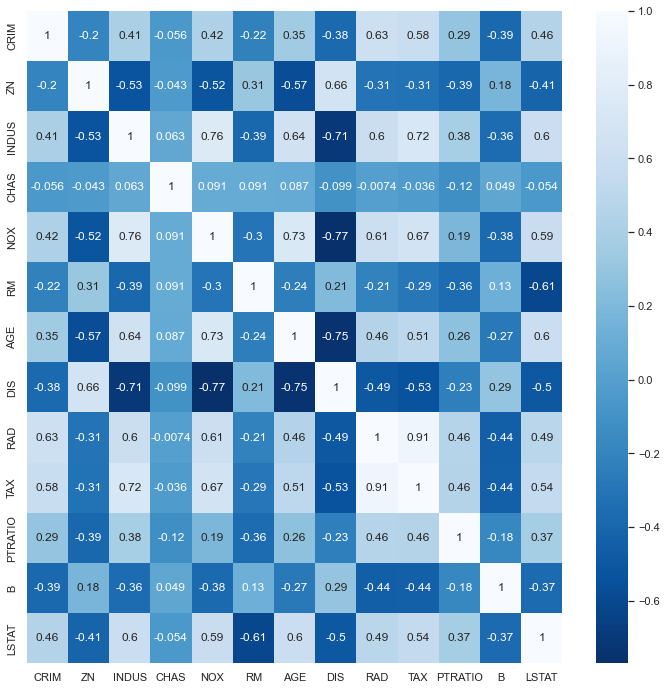

In [378]:
plt.figure(figsize = (12,12))
sns.heatmap(X.corr(), annot = True, cmap = plt.cm.Blues_r)

Here, we can see "Tax" and "RAD" are highly correlated with positive correlation of "0.91" so we can drop either one of them and use only one to predict dependant variable. Similarly, we can define a threshold and check this for all columns. 

In [415]:
def correlation(data, threshold):
    corr_matrix = set() #using set so only unique columns can be captured
    corr = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) >= threshold:  
#also in this scnerio we are also dropping negative correlation
#but in real world we should take in negatively correlated columns so our algo can predict better
                col_name = data.columns[i]
                corr_matrix.add(col_name)
    return corr_matrix

In [416]:
correlation(X, 0.85)  #generally 85% of correlation is considered


{'TAX'}

In [417]:
X.drop(correlation(X, 0.70), axis = 1).head()

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33


**Feature Selection using Information Gain for Classification**

Estimate mutual information for a discrete target variable.

Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances as described in [2] and [3]. Both methods are based on the idea originally proposed in [4].

The mutual information b/w two random variable X and Y can be stated formally as :

I(X:Y) = H(X) - H(X|Y) where I(H;Y) is the mutual information for X and Y , H(X) is the entropy of X and H(X|Y) is the conditional entropy for X given Y. Entropy is 0 for pure split and 1 for impure split. 

https://www.youtube.com/watch?v=FuTRucXB9rA

In [418]:
wine_df = pd.read_csv('winequality-red.csv')

In [419]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [420]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [423]:
wine_df.shape

(1599, 12)

Alawys perform any feature selction on train data only and then remove it from test to avoid overfitting. Here MI will calculate the relationship b/w dependant and Independant variable so we can pick the highest dependant variables from all 

In [426]:
from sklearn.model_selection import train_test_split
X = wine_df.drop('quality', axis = 1)
Y = wine_df['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [431]:
from sklearn.feature_selection import mutual_info_classif
mf_classif = mutual_info_classif(X_train, Y_train)
mf_classif

array([0.04879592, 0.11044231, 0.0600549 , 0.0127741 , 0.0490649 ,
       0.00132288, 0.09220606, 0.09863005, 0.00856387, 0.08880112,
       0.17800749])

In [436]:
mf_classif = pd.Series(mf_classif)
mf_classif.index = X_train.columns
mf_classif.sort_values(ascending = False)

alcohol                 0.178007
volatile acidity        0.110442
density                 0.098630
total sulfur dioxide    0.092206
sulphates               0.088801
citric acid             0.060055
chlorides               0.049065
fixed acidity           0.048796
residual sugar          0.012774
pH                      0.008564
free sulfur dioxide     0.001323
dtype: float64

<AxesSubplot:>

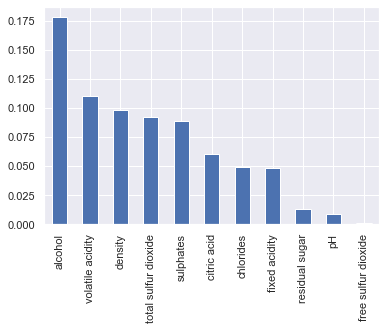

In [437]:
mf_classif.sort_values(ascending = False).plot(kind = 'bar') 
# we can pick up the top 5 features who are highest correlated to dependant variable of quality 

In [446]:
from sklearn.feature_selection import SelectKBest
K_best = SelectKBest(mutual_info_classif, k = 5)
K_best.fit(X_train, Y_train)
K_best.get_support()
X_train.columns[K_best.get_support()]  #top 5 columns based on mutual info classification 

Index(['volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol'], dtype='object')

**Univariate feature selection**

Univariate feature selection works by selecting the best features based on univariate statistical tests.

**Methods in sklearn**

**SelectKBest** removes all but the highest scoring features

**SelectPercentile** removes all but a user-specified highest scoring percentage of features

**These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile):**

For regression: f_regression, mutual_info_regression

For classification: chi2, f_classif, mutual_info_classif

There are some drawbacks* of using **F-Test** to select your features. F-Test checks for and only captures **linear relationships** between features and labels. A highly correlated feature is given higher score and less correlated features are given lower score. Correlation is highly deceptive as it doesn’t capture strong non-linear relationships.*

On the other hand, mutual information* methods can capture **any kind of statistical dependency**, but being non-parametric, they require more samples for accurate estimation. The function relies on **non-parametric methods based on entropy estimation from k-nearest neighbors distances**

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#:~:text=As%20F%2Dtest%20captures%20only,intuitive%20perception%20for%20this%20example.

**Feature Selection using Information Gain for Classification**

Calculating Mutual information and selecting best features where output is continous target variable 

In [449]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [468]:
num_cols = [column for column in housing_df.columns if housing_df[column].dtypes != 'O']
df = housing_df[num_cols]

In [469]:
housing_df['Id'].dtypes

dtype('int64')

In [472]:
df.drop('Id', axis = 1, inplace = True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [473]:
#always perfrom feature selection on training data first to avoid data leakage and overfitting
X = df.drop('SalePrice', axis =1 )
Y = df['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5)

In [474]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
148,20,63.0,7500,7,5,2004,2005,120.0,680,0,400,1080,1080,0,0,1080,1,0,1,0,3,1,6,0,NaN,0,0,0,0,0,0,0,0,0,4,2008
644,20,85.0,9187,9,5,2009,2009,162.0,1121,0,645,1766,1766,0,0,1766,1,0,2,1,2,1,7,1,2009.0,3,478,195,130,0,0,0,0,0,10,2009
697,20,57.0,6420,5,7,1952,1952,0.0,210,551,219,980,1148,0,0,1148,0,1,1,0,2,1,6,0,1952.0,1,308,0,0,0,0,0,0,0,9,2006
243,160,75.0,10762,6,6,1980,1980,0.0,0,0,626,626,626,591,0,1217,0,0,1,1,3,1,6,1,1980.0,1,288,0,28,0,0,0,0,0,4,2009
1337,30,153.0,4118,4,4,1941,1950,0.0,0,0,693,693,693,0,0,693,0,0,1,0,2,1,4,0,NaN,0,0,0,20,0,0,0,0,0,3,2006


In [475]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      135
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       49
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [476]:
from sklearn.feature_selection import mutual_info_regression 
mf_regression = mutual_info_regression(X_train.fillna(0), Y_train)
mf_regression

array([0.26749301, 0.17497285, 0.12066406, 0.55725597, 0.11357895,
       0.32473786, 0.25714603, 0.11983689, 0.09482408, 0.00850978,
       0.08913683, 0.35972471, 0.28448794, 0.21615318, 0.00972861,
       0.4266662 , 0.0141468 , 0.        , 0.23756332, 0.06685886,
       0.06504129, 0.02494604, 0.18046743, 0.15435719, 0.28298016,
       0.37399915, 0.39677789, 0.09113621, 0.18628231, 0.        ,
       0.        , 0.00452722, 0.00240208, 0.        , 0.01805706,
       0.        ])

In [479]:
mf_regression = pd.Series(mf_regression)
mf_regression.index = X_train.columns
mf_regression.sort_values(ascending = False)

OverallQual      0.557256
GrLivArea        0.426666
GarageArea       0.396778
GarageCars       0.373999
TotalBsmtSF      0.359725
YearBuilt        0.324738
1stFlrSF         0.284488
GarageYrBlt      0.282980
MSSubClass       0.267493
YearRemodAdd     0.257146
FullBath         0.237563
2ndFlrSF         0.216153
OpenPorchSF      0.186282
TotRmsAbvGrd     0.180467
LotFrontage      0.174973
Fireplaces       0.154357
LotArea          0.120664
MasVnrArea       0.119837
OverallCond      0.113579
BsmtFinSF1       0.094824
WoodDeckSF       0.091136
BsmtUnfSF        0.089137
HalfBath         0.066859
BedroomAbvGr     0.065041
KitchenAbvGr     0.024946
MoSold           0.018057
BsmtFullBath     0.014147
LowQualFinSF     0.009729
BsmtFinSF2       0.008510
ScreenPorch      0.004527
PoolArea         0.002402
BsmtHalfBath     0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
MiscVal          0.000000
YrSold           0.000000
dtype: float64

<AxesSubplot:>

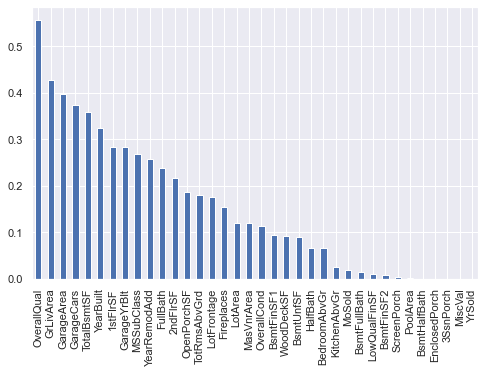

In [486]:
plt.figure(figsize = (8,5))
mf_regression.sort_values(ascending = False).plot(kind = 'bar')

In [491]:
from sklearn.feature_selection import SelectPercentile
percentile = SelectPercentile(mutual_info_regression, percentile = 20) #top 20 percentile
percentile.fit(X_train.fillna(0), Y_train)
X_train.columns[percentile.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

**Feature selection using Chi-square test**

Compute chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

**when we have more than 2 categorical input variables and categorical (classification) output**

In [533]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [534]:
df = titanic_df[['Survived', 'Pclass', 'Sex', 'Embarked']]
df.head()  #only taking in categorical input and output variables 

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [535]:
#splitting b/w input and ouput
X = df.drop('Survived', axis = 1)
Y = df['Survived']

In [536]:
#splitting b/w training and test to avoid overfitting

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [537]:
X_train.head()

,Pclass,Sex,Embarked
792,3,female,S
673,2,male,S
70,2,male,S
97,1,male,C
163,3,male,S


We will have to encode these so they can be evaulated further in terms of p value and fscore on Chi-square

In [538]:
X_train['Sex'] = np.where(X_train['Sex'] == 'male', 1,0)
ordinal_label = {k:i for i,k in enumerate(df['Embarked'].unique(),0)}
X_train['Embarked'] = X_train['Embarked'].map(ordinal_label)

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_16232/1844414452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = np.where(X_train['Sex'] == 'male', 1,0)
C:\Users\ngupt240\AppData\Local\Temp/ipykernel_16232/1844414452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Embarked'] = X_train['Embarked'].map(ordinal_label)


In [539]:
X_train.head(10)

,Pclass,Sex,Embarked
792,3,0,0
673,2,1,0
70,2,1,0
97,1,1,1
163,3,1,0
211,2,0,0
723,2,1,0
138,3,1,0
179,3,1,0
701,1,1,0


In [540]:
from sklearn.feature_selection import chi2
chi_sqaure = chi2(X_train, Y_train)
chi_sqaure  #it gives fscore and p values

(array([25.8557787 , 68.16683118, 13.64462821]),
 array([3.67901629e-07, 1.50231656e-16, 2.20872320e-04]))

Higher the fscore the better (precision and recall numbers) , lower the pvalues (less the signivance values) and hence more evidence to reject Null Hypothesis 

In [562]:
p_values= chi_sqaure[1]
p_values = pd.Series(p_values)
p_values.index = X_train.columns
p_values.sort_values(ascending = True)    #sex makes the most important feature in survial as compared to class


f_score= chi_sqaure[0]                    #sex has highest f score
f_score = pd.Series(f_score)
f_score.index = X_train.columns
f_score.sort_values(ascending = False)

Sex         1.502317e-16
Pclass      3.679016e-07
Embarked    2.208723e-04
dtype: float64

In [558]:
from sklearn.feature_selection import SelectKBest
best_features = SelectKBest(chi2, k= 1)
best_features.fit(X_train, Y_train)
X_train.columns[best_features.get_support()] #top 1 on basis of chi sqaure p value and f score

Index(['Sex'], dtype='object')

In [559]:
best_features.scores_ #f score of columns 

array([25.8557787 , 68.16683118, 13.64462821])

In [563]:
best_features.pvalues_  #p value of all columns 

array([3.67901629e-07, 1.50231656e-16, 2.20872320e-04])

**Feature selection using Feature Importance**

In [564]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)

ExtraTreesClassifier()

In [566]:
print(model.feature_importances_)

[0.28908545 0.6561436  0.05477095]


<AxesSubplot:>

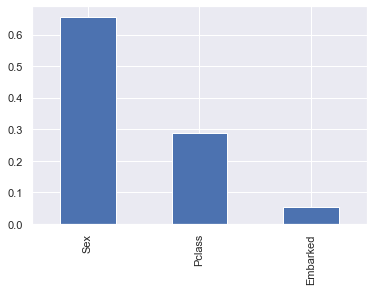

In [569]:
ranked_series = pd.Series(model.feature_importances_, index = X_train.columns)
ranked_series.sort_values(ascending = False).plot(kind = 'bar')

Feature Importance of **Sex** is highest as confirmed by Univariate Analysis of Chi-square as well where it had highest **F-score** and lowest **P-values**. It makes sense becasue survival rate of men was less than survival rate of women. Let's confirm this with correlation of survival

In [582]:
ordianal_encoding = {i: k for k,i in enumerate(df['Sex'].unique(),0)}
df['Sex'] = df['Sex'].map(ordianal_encoding)

ordianal_encoding = {i: k for k,i in enumerate(df['Embarked'].unique(),0)}
df['Embarked'] = df['Embarked'].map(ordianal_encoding)

C:\Users\ngupt240\AppData\Local\Temp/ipykernel_16232/2591222132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map(ordianal_encoding)
C:\Users\ngupt240\AppData\Local\Temp/ipykernel_16232/2591222132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].map(ordianal_encoding)


<AxesSubplot:>

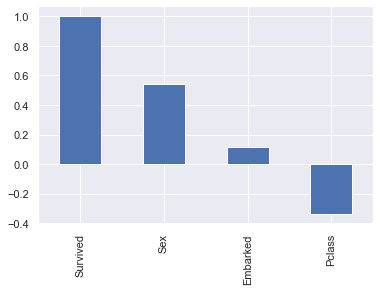

In [587]:
df.corr()['Survived'].sort_values(ascending = False).plot(kind = 'bar')

It is proved that sex has highest value in correlation with dependant variable as well so it is the most important variable while PClass continues to rank low in feature importance, univariate analysis as well as direct correlation.

**Modelling** <br>
**Deployment**  <br> 
**Hyperparameter Tuning** <br>
**Metrics** <br>

## **Performance Metrics in Classification problem statement**

In this we will try to cover different type of performance metrics that should be used to check which model is performing best to classify the problem

* Confusion Matrix
* FPR (Type 1 Error) 
* FNR (Type 2 Error)
* Accuracy score 
* Precision (+ve pred value)
* Recall (TPR/Sensitivity)
* F beta
* ROC curve, AOC curve
* PR curve

**Balanced dataset**

* **Confusion matrix**

A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It is used to measure the performance of a classification model. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score <br>

**True Positives (TP):** when the actual value is Positive and predicted is also Positive. <br>
**True negatives (TN):** when the actual value is Negative and prediction is also Negative.<br>
**False positives (FP):** When the actual is negative but prediction is Positive. Also known as the Type 1 error <br>
**False negatives (FN):** When the actual is Positive but the prediction is Negative. Also known as the Type 2 error<br>


* FPR, FNR

In [600]:
from IPython.display import Image
Image(url="1_3yGLac6F4mTENnj5dBNvNQ.webp", width=300, height=500)

**Accuracy score**

Accuracy simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions.

The accuracy metric is not suited for imbalanced classes. Accuracy has its own disadvantages, for imbalanced data, when the model predicts that each point belongs to the majority class label, the accuracy will be high. But, the model is not accurate.

It is a measure of correctness that is achieved in true prediction. In simple words, it tells us how many predictions are actually positive out of all the total positive predicted.

Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or there is no class imbalance.

In [607]:
from IPython.display import Image
Image(url="accuracy_score.webp", width=400, height=500)

**Imbalanced dataset**

**Precision**

It is a measure of correctness that is achieved in true prediction. In simple words, it tells us how many predictions are actually positive out of all the total positive predicted.

Precision is defined as the ratio of the total number of correctly classified positive classes divided by the total number of predicted positive classes. Or, out of all the predictive positive classes, how much we predicted correctly. Precision should be high(ideally 1).

“Precision is a useful metric in cases where False Positive is a higher concern than False Negatives”

In [606]:
from IPython.display import Image
Image(url="precision.webp", width=400, height=500)

Ex 1:- **In Spam Detection :** Need to focus on precision

Suppose mail is not a spam but model is predicted as spam : FP (False Positive). We always try to reduce FP.

Ex 2:- **Precision is important in music or video recommendation systems**, e-commerce websites, etc. Wrong results could lead to customer churn and be harmful to the business.

**Recall**

It is a measure of actual observations which are predicted correctly, i.e. how many observations of positive class are actually predicted as positive. It is also known as Sensitivity. Recall is a valid choice of evaluation metric when we want to capture as many positives as possible.

Recall is defined as the ratio of the total number of correctly classified positive classes divide by the total number of positive classes. Or, out of all the positive classes, how much we have predicted correctly. Recall should be high(ideally 1).

“Recall is a useful metric in cases where False Negative trumps False Positive”



In [605]:
from IPython.display import Image
Image(url="recall.webp", width=400, height=500)

Ex 1:- suppose person having **cancer (or) not?** He is suffering from cancer but model predicted as not suffering from cancer

Ex 2:- Recall is important in **medical cases** where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!

Recall would be a better metric because we don’t want to accidentally discharge an infected person and let them mix with the healthy population thereby spreading contagious virus. 

**F1 Beta**

Beta is 1 when we give equal importance to precision and recall. When FPR > FNR then, we can keep Beta between 0 and 1. When FNR> FPR then genrally we keep our Beta value between 1 and 10.

The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall. We use harmonic mean because it is not sensitive to extremely large values, unlike simple averages.

F1 score sort of maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.

There will be cases where there is no clear distinction between whether Precision is more important or Recall. We combine them!

In practice, when we try to increase the precision of our model, the recall goes down and vice-versa. The F1-score captures both the trends in a single value.

In [609]:
from IPython.display import Image
Image(url="f1score.webp", width=500, height=500)

In [610]:
from IPython.display import Image
Image(url="sensitivity and specifity.webp", width=500, height=500)

**AOC ROC curve (Threshold of classification in Balanced dataset)**

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.

In [611]:
from IPython.display import Image
Image(url="ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.webp", width=500, height=500)

**Precision-Recall curves (Threshold for classification in Imbalanced Dataset**

Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

Positive Predictive Power = True Positives / (True Positives + False Positives)
or

Precision = True Positives / (True Positives + False Positives)
Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

Recall = True Positives / (True Positives + False Negatives)
or

Sensitivity = True Positives / (True Positives + False Negatives)
Recall == Sensitivity
Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).

In [612]:
from IPython.display import Image
Image(url="Precision-Recall-Plot.webp", width=500, height=500)

### When to Use ROC vs. Precision-Recall Curves?
Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.
The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance.

## **Performance Metrics in Regression problem statement**

**R2 squared and Absolute R2 square**

The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.

R2 = 1 - (SSR/SSM)

SSR > Sum of sqaured resideuals between y and y^ (predicted)
SSM > Sum of squared resideuals between y and y- (mean)

Usually SSR < SSM since best fit line will perform better than mean line but if SSR> SSM, R2 will be negative and that means your model is working worse than the average line 

#from sklearn.metrics import r2_score



**Problem with R2**

R-squared comes with an inherent problem – additional input variables will make the R-squared stay the same or increase (this is due to how the R-squared is calculated mathematically). Therefore, even if the additional input variables show no relationship with the output variables, the R-squared will increase.

**Adjusted R2 score** 

The adjusted R-squared is a modified version of R-squared that accounts for predictors that are not significant in a regression model. In other words, the adjusted R-squared shows whether adding additional predictors improve a regression model or not.

Adjusted R2 = (1-R2)*(N-1)/(N-p-1) 

It penalises if you add features that are not correlated to dependant variable and hence R2 increases proportionately and not fully. 

**Mean Absolute Error**


The Mean Absolute Error (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.

The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

MAE = summation|y-y^|/n

Advantages :
1. Robut to Outliers (Scope of Gradient descent is not affacted that much)
2. Units same as input (Not sqaured)

Disadvantages:
1. Not differnetaiable 
2. Complex optimisation


**Mean squared error**

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.

Advantages : 
1. Differentiable
2. Easy to implement

Disadvanatges:
1. Not roubust to outliers (change is slope of Gradient descent by a huge amount on outliers)
2. It changes the unit to sqaure

**Root Mean squared error**

Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

Advantages :
1. Differentaiable 
2. will not change the units 

Disadvantages :
1. Not roubust to outliers 

https://www.google.com/search?q=mean+squared+error+towards+data+science&safe=active&sca_esv=561932315&rlz=1C1GCCB_en&sxsrf=AB5stBjC_QK135BVVWyIL3PnB4GpKQKKdw%3A1693575442035&ei=EunxZN1zkbDaug_9kZk4&oq=mean+squared+error+toward+&gs_lp=Egxnd3Mtd2l6LXNlcnAiGm1lYW4gc3F1YXJlZCBlcnJvciB0b3dhcmQgKgIIADIHECEYoAEYCjIHECEYoAEYCkiEI1C6BFigHHABeAGQAQCYAbUCoAHOD6oBBTItNy4xuAEDyAEA-AEBwgIHECMYsAMYJ8ICChAAGEcY1gQYsAPCAgoQABiKBRiwAxhDwgIHECMYigUYJ8ICBxAAGIoFGEPCAgoQABiABBgUGIcCwgIFEAAYgATCAgYQABgWGB7CAgoQABgWGB4YDxgKwgIFECEYoAHCAgQQIRgV4gMEGAAgQYgGAZAGCg&sclient=gws-wiz-serp

In [5]:
titanic_df['Name'].astype(str).apply(lambda x : x[0])

0      B
1      C
2      H
3      F
4      A
      ..
886    M
887    G
888    J
889    B
890    D
Name: Name, Length: 891, dtype: object